In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from IPython.display import Image
from io import StringIO 
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
data = pd.read_csv('Diabetes.csv', sep=',')
# формируем датафрейм
target_column = 'Diagnosis'
feature_names = ['Age', 'BMI', 'FBS', 'HbA1c', 'Family History of Diabetes', 'Smoking', 'Exercise']
df = pd.DataFrame(data=data, columns=feature_names)
df[target_column] = data[target_column]
df.head()

Age  BMI  FBS  HbA1c  Family History of Diabetes  Smoking  Exercise  \
0   45   25  100    5.7                           0        0       0.5   
1   55   30  120    6.4                           1        1       0.0   
2   65   35  140    7.1                           1        1       0.0   
3   75   40  160    7.8                           1        1       0.0   
4   40   20   80    5.0                           0        0       0.5   

   Diagnosis  
0          0  
1          1  
2          1  
3          1  
4          0

In [94]:
df.shape

(481, 8)

In [95]:
df.dtypes

Age                             int64
BMI                             int64
FBS                             int64
HbA1c                         float64
Family History of Diabetes      int64
Smoking                         int64
Exercise                      float64
Diagnosis                       int64
dtype: object

2. Проверка на пропуски

In [96]:
df.isnull().sum()

Age                           0
BMI                           0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Exercise                      0
Diagnosis                     0
dtype: int64

3. Разделение выборки на обучающую и тестовую

In [97]:
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(df[['BMI', 'HbA1c']].values, 
    df['Diagnosis'].values, test_size=0.5, random_state=1)

4.1 Бэггинг

In [98]:
# Обучим классификатор на 5 деревьях
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(data_X_test, data_Y_test)

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [99]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([165, 137, 177, 180, 103, 142, 138,  26, 202, 152, 238, 138, 191,
        179,  50, 172, 126, 240,  67,  34, 221,  24,  43, 187, 149, 230,
        228, 236, 186,  58, 112, 118, 104,  46, 104, 203,  27,  74, 147,
         37, 228,  45, 187, 182, 132,  44, 142,  69, 156, 203, 225, 235,
         74, 234,  23, 167, 108, 188,  64, 171,   0,  50, 201, 150,  78,
        171,  42, 112,  77, 156,  50,   4, 114,  14,  56, 170, 196, 105,
        204,  43,  39, 196, 191,  43, 139, 212, 223, 237,  80, 176, 127,
        159, 116, 225,  56,  54, 199, 178, 210, 110, 138, 237, 220, 136,
        205,   4,  79, 236,  62,  44,  60, 218, 111,  74, 153, 114, 125,
        195, 137, 197, 102, 153,  88,  14, 130, 107, 110, 175, 118,  41,
        219, 151, 174,  62, 208,  66,  37,  14,  52, 120, 117, 224, 171,
        209,  68, 176, 171, 216, 213,  73, 190,  39, 188, 104,  92, 198,
        150,  44, 139, 165,  22, 167,  66, 163, 107, 171,  27, 224, 238,
        153,  85,  54,  40, 146, 222, 236, 234,  95

In [100]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, data_X_test.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

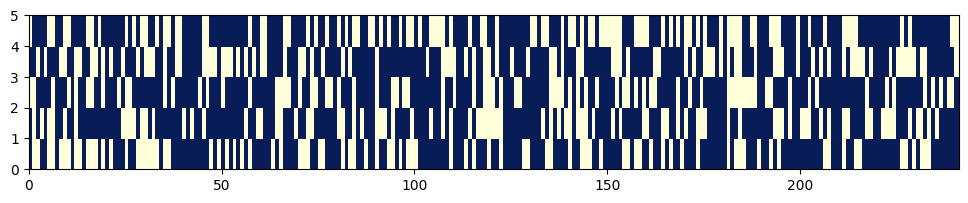

In [101]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [102]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 36.51%
Для модели № 2 размер OOB составляет 36.51%
Для модели № 3 размер OOB составляет 33.61%
Для модели № 4 размер OOB составляет 38.59%
Для модели № 5 размер OOB составляет 39.83%


In [103]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.6887966804979253, 0.3112033195020747)

In [104]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.77777778, 0.22222222],
       [0.        , 1.        ],
       [       nan,        nan],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [       nan,        nan],
       [1.        , 0.        ]])

In [105]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

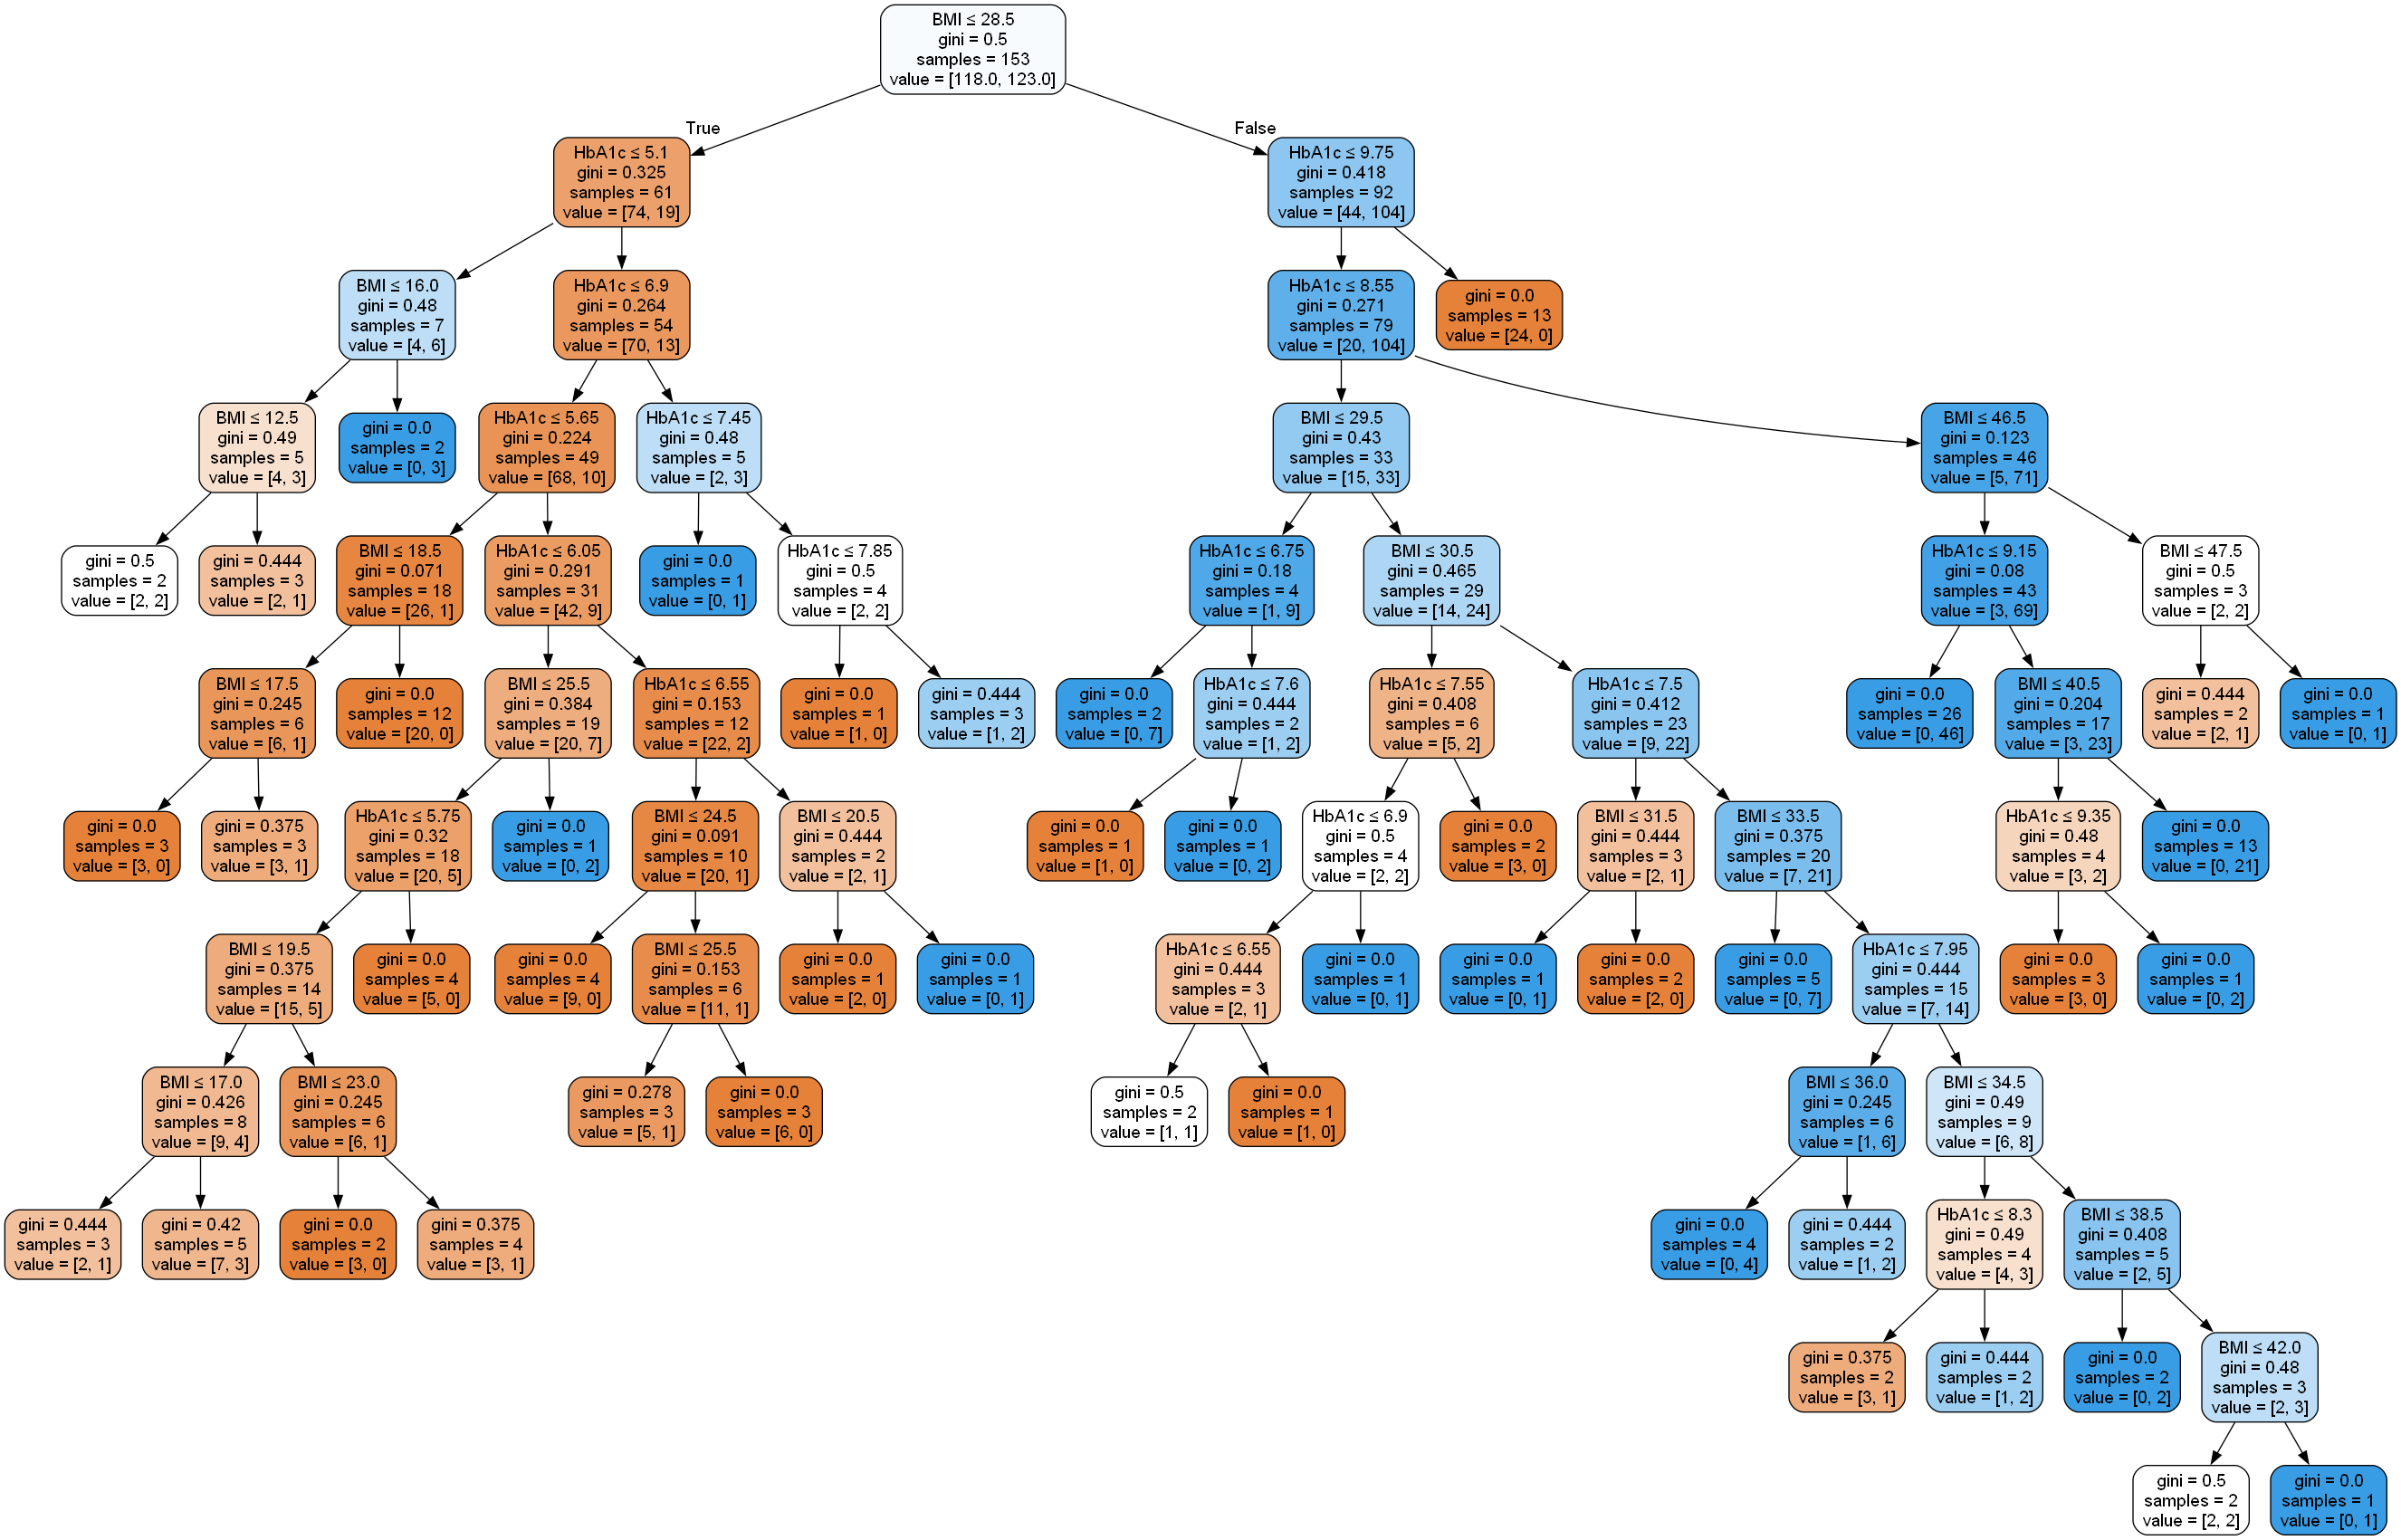

In [106]:
# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[0], ['BMI', 'HbA1c']), width='80%')

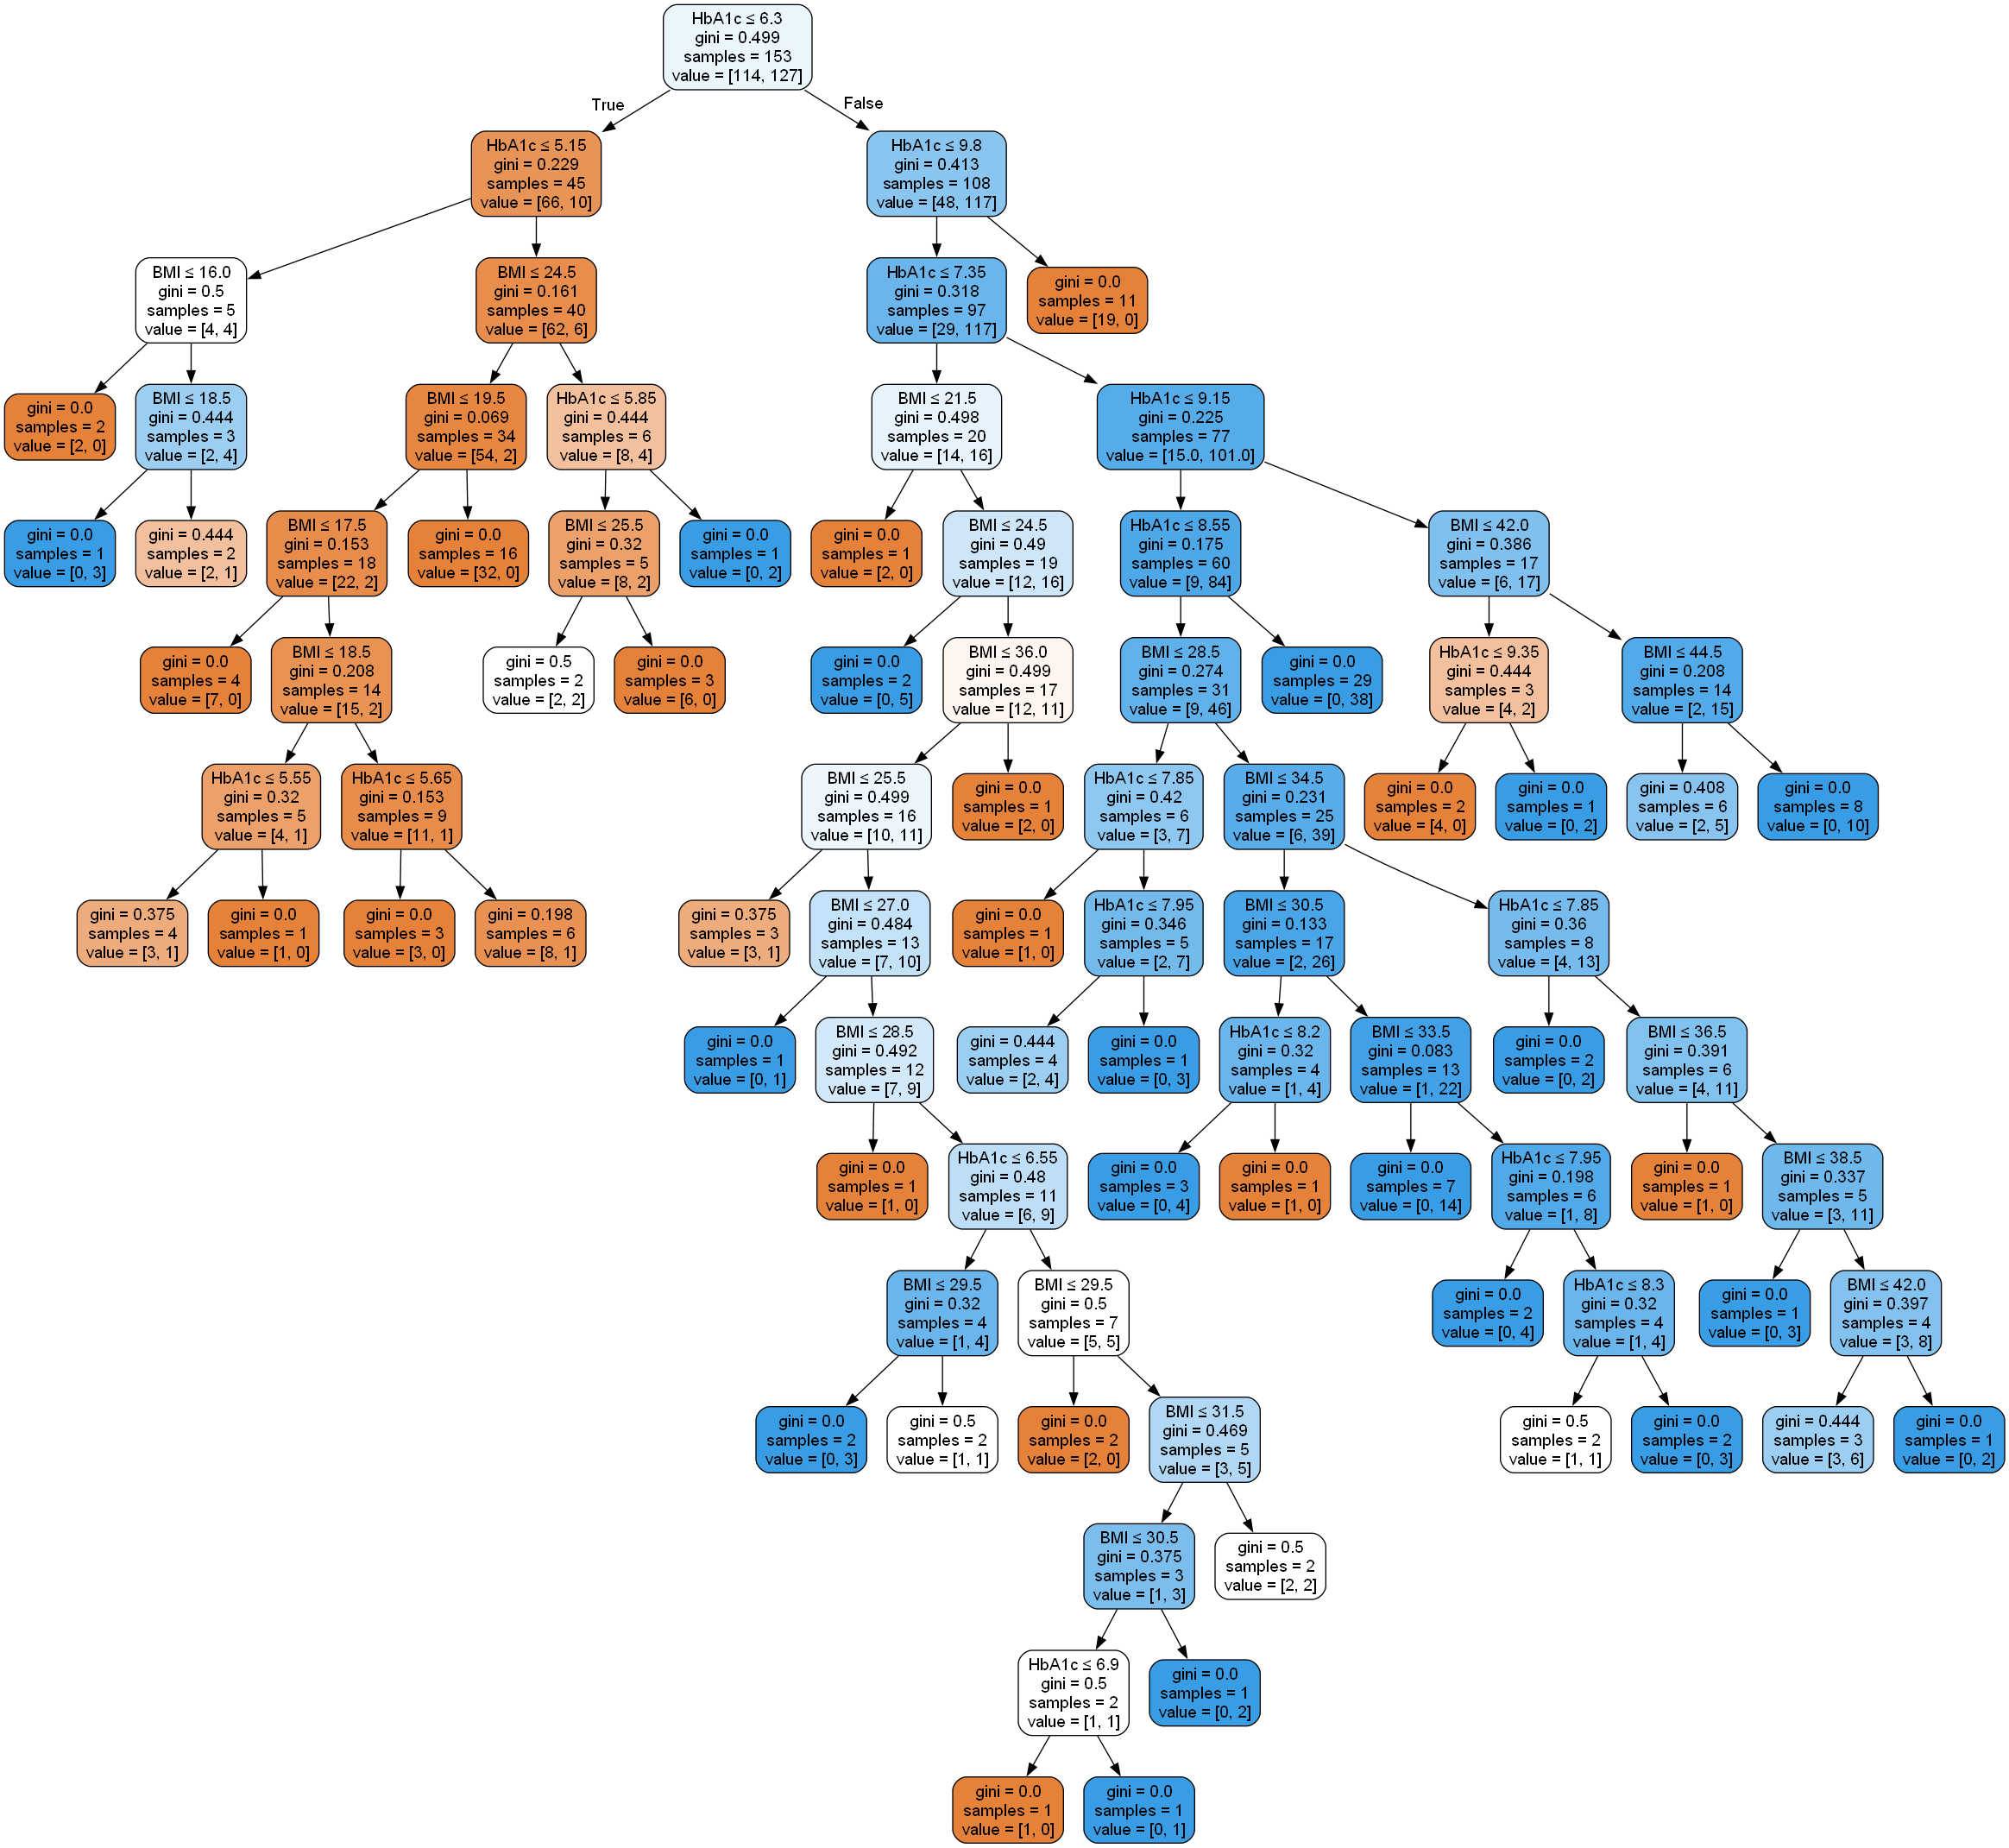

In [107]:
Image(get_png_tree(bc1.estimators_[1], ['BMI', 'HbA1c']), width='80%')

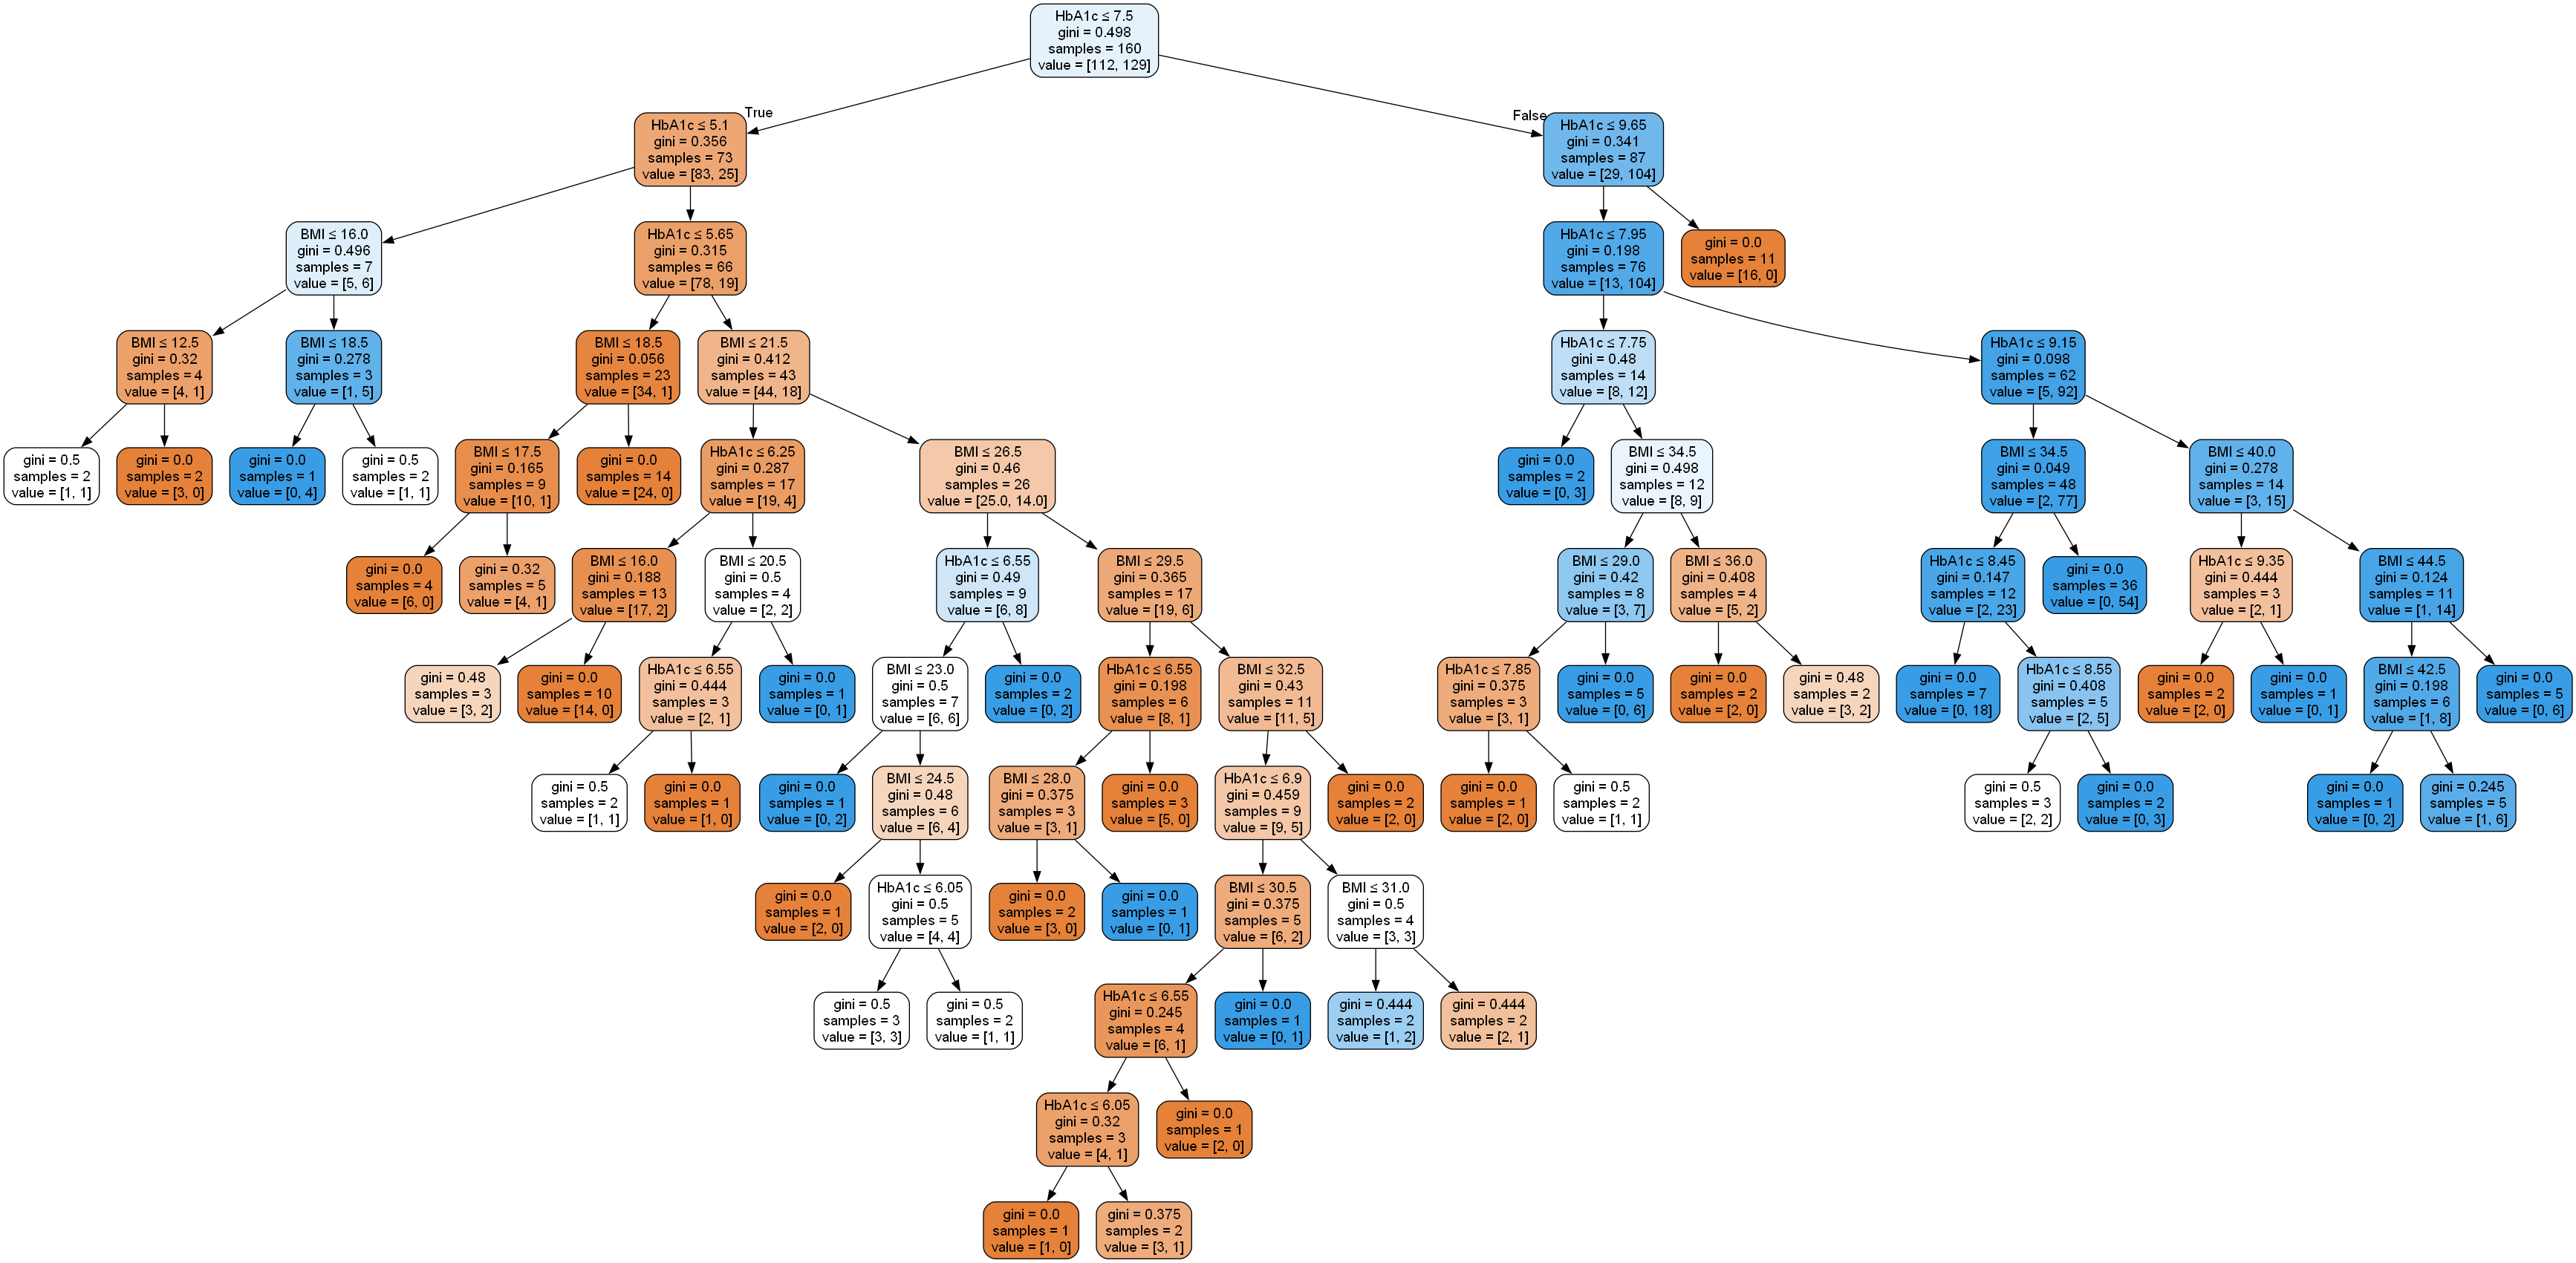

In [108]:
Image(get_png_tree(bc1.estimators_[2], ['BMI', 'HbA1c']), width='80%')

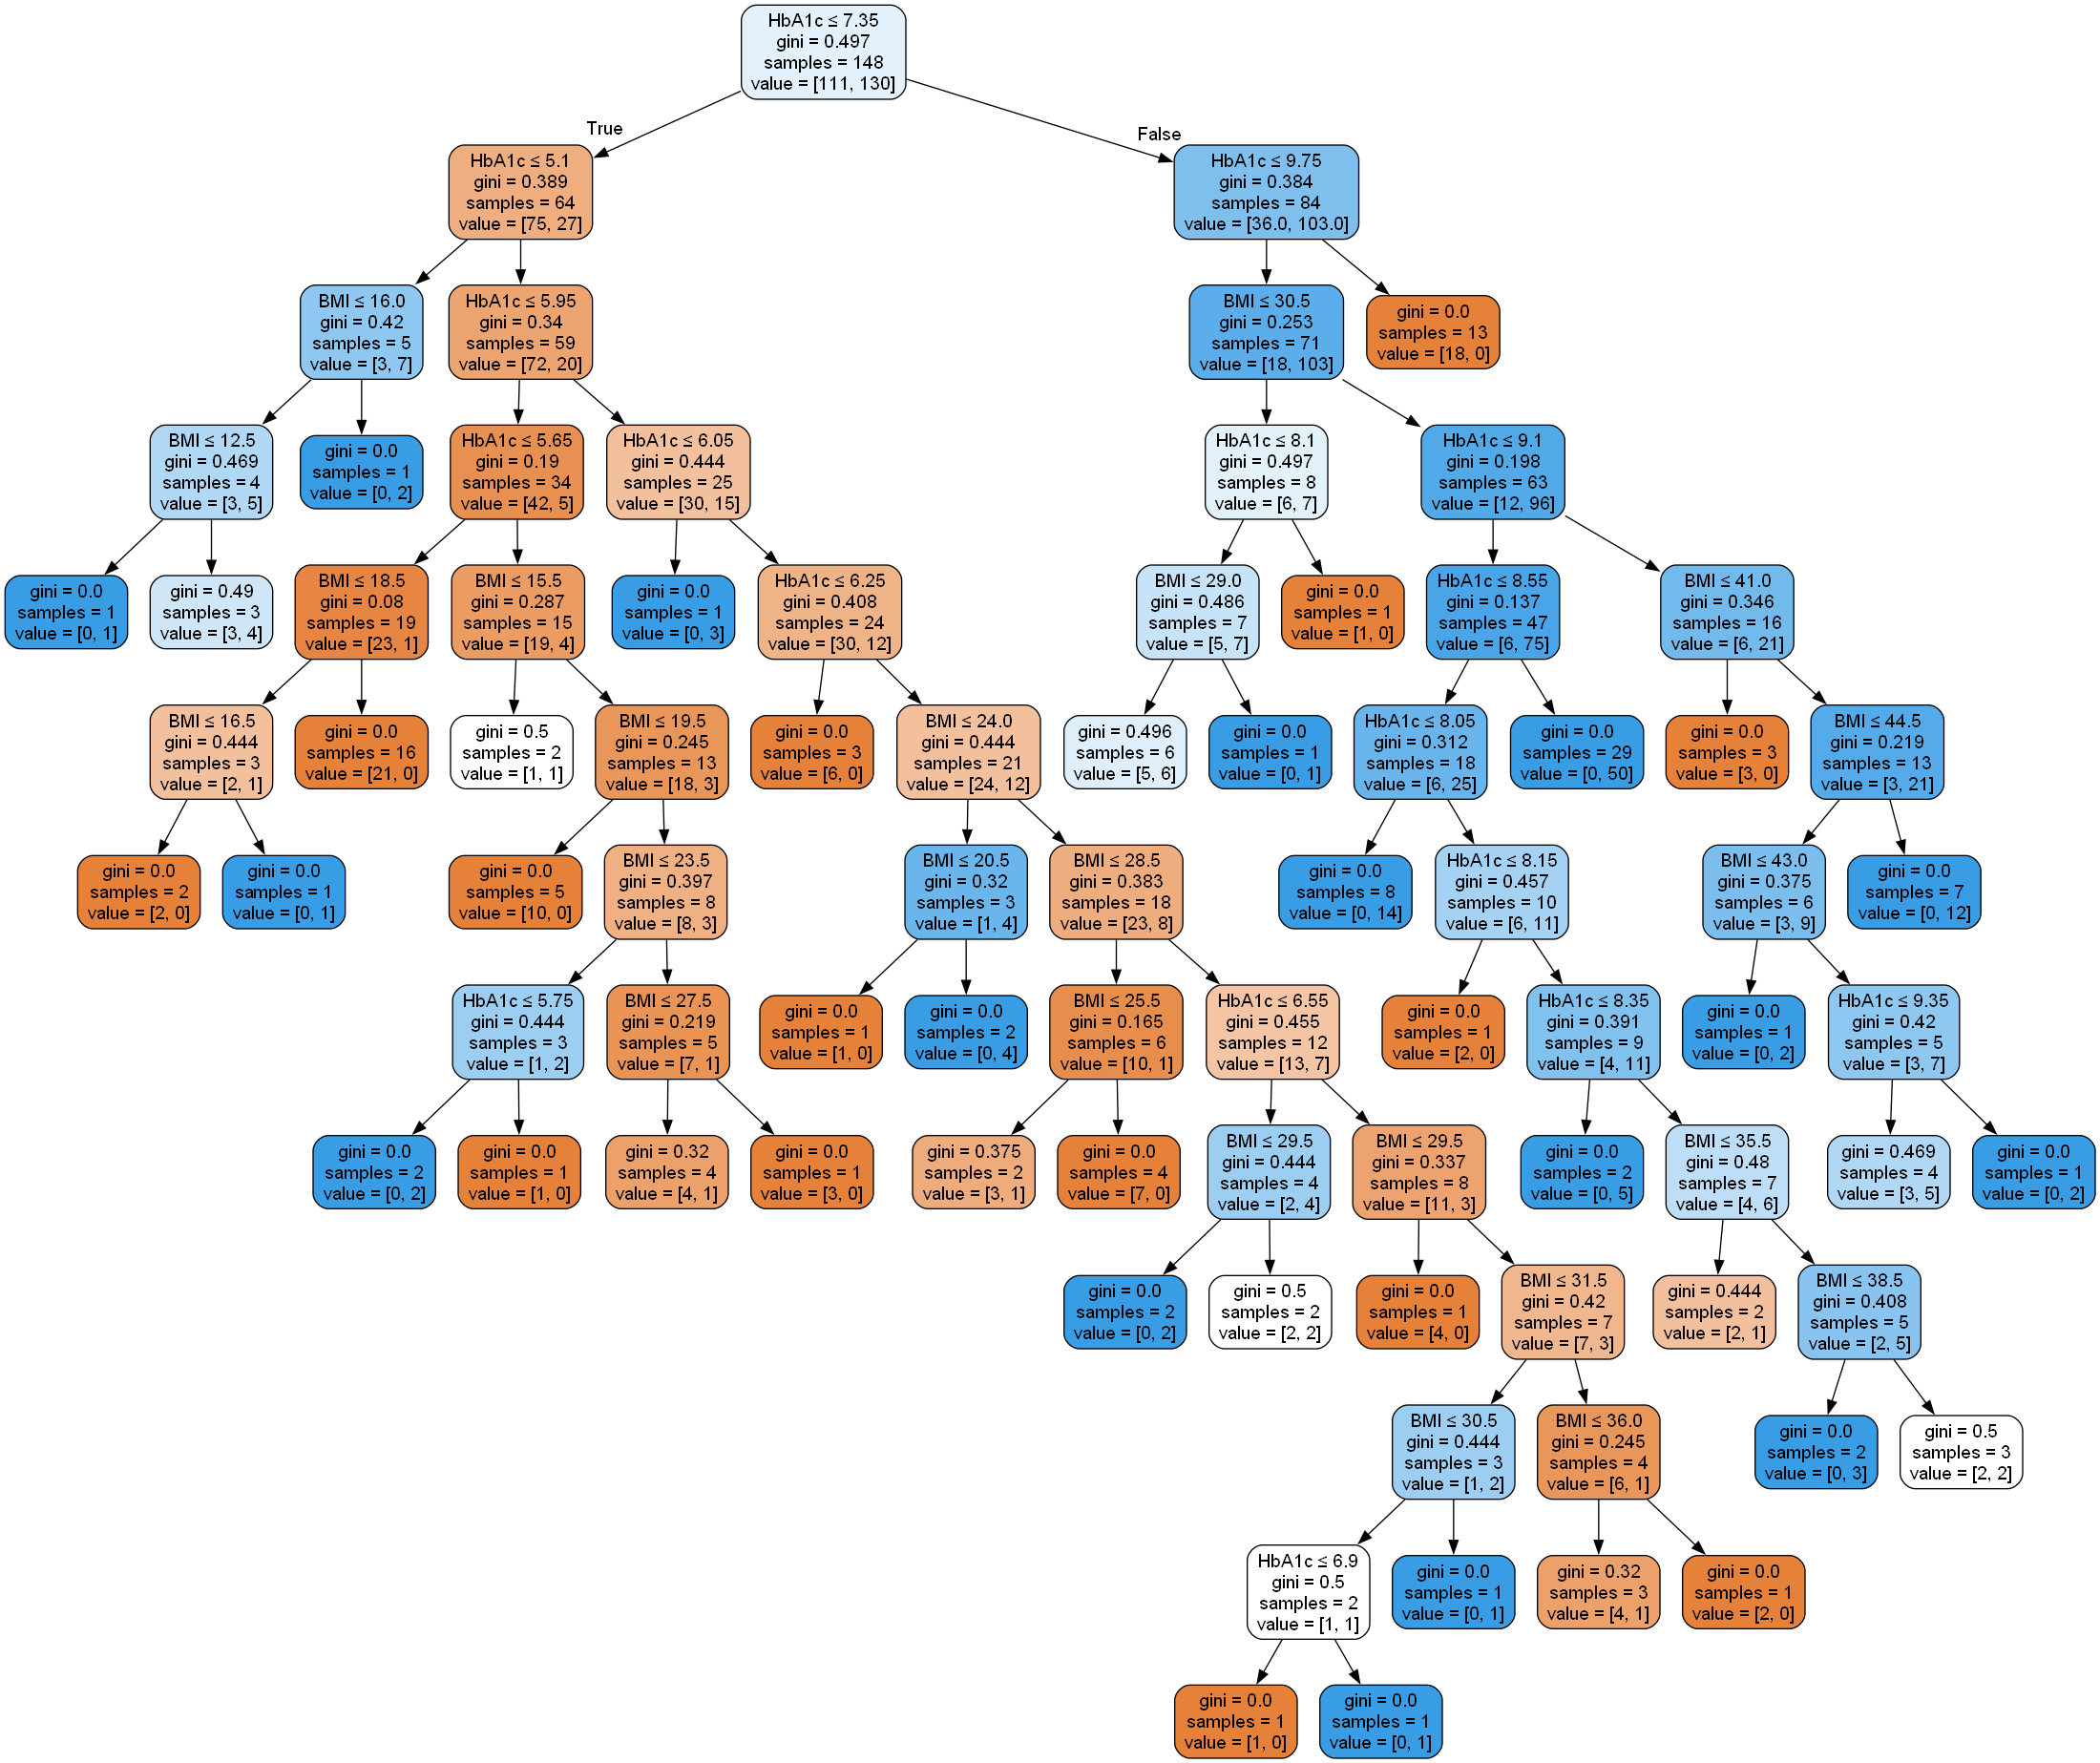

In [109]:
Image(get_png_tree(bc1.estimators_[3], ['BMI', 'HbA1c']), width='80%')

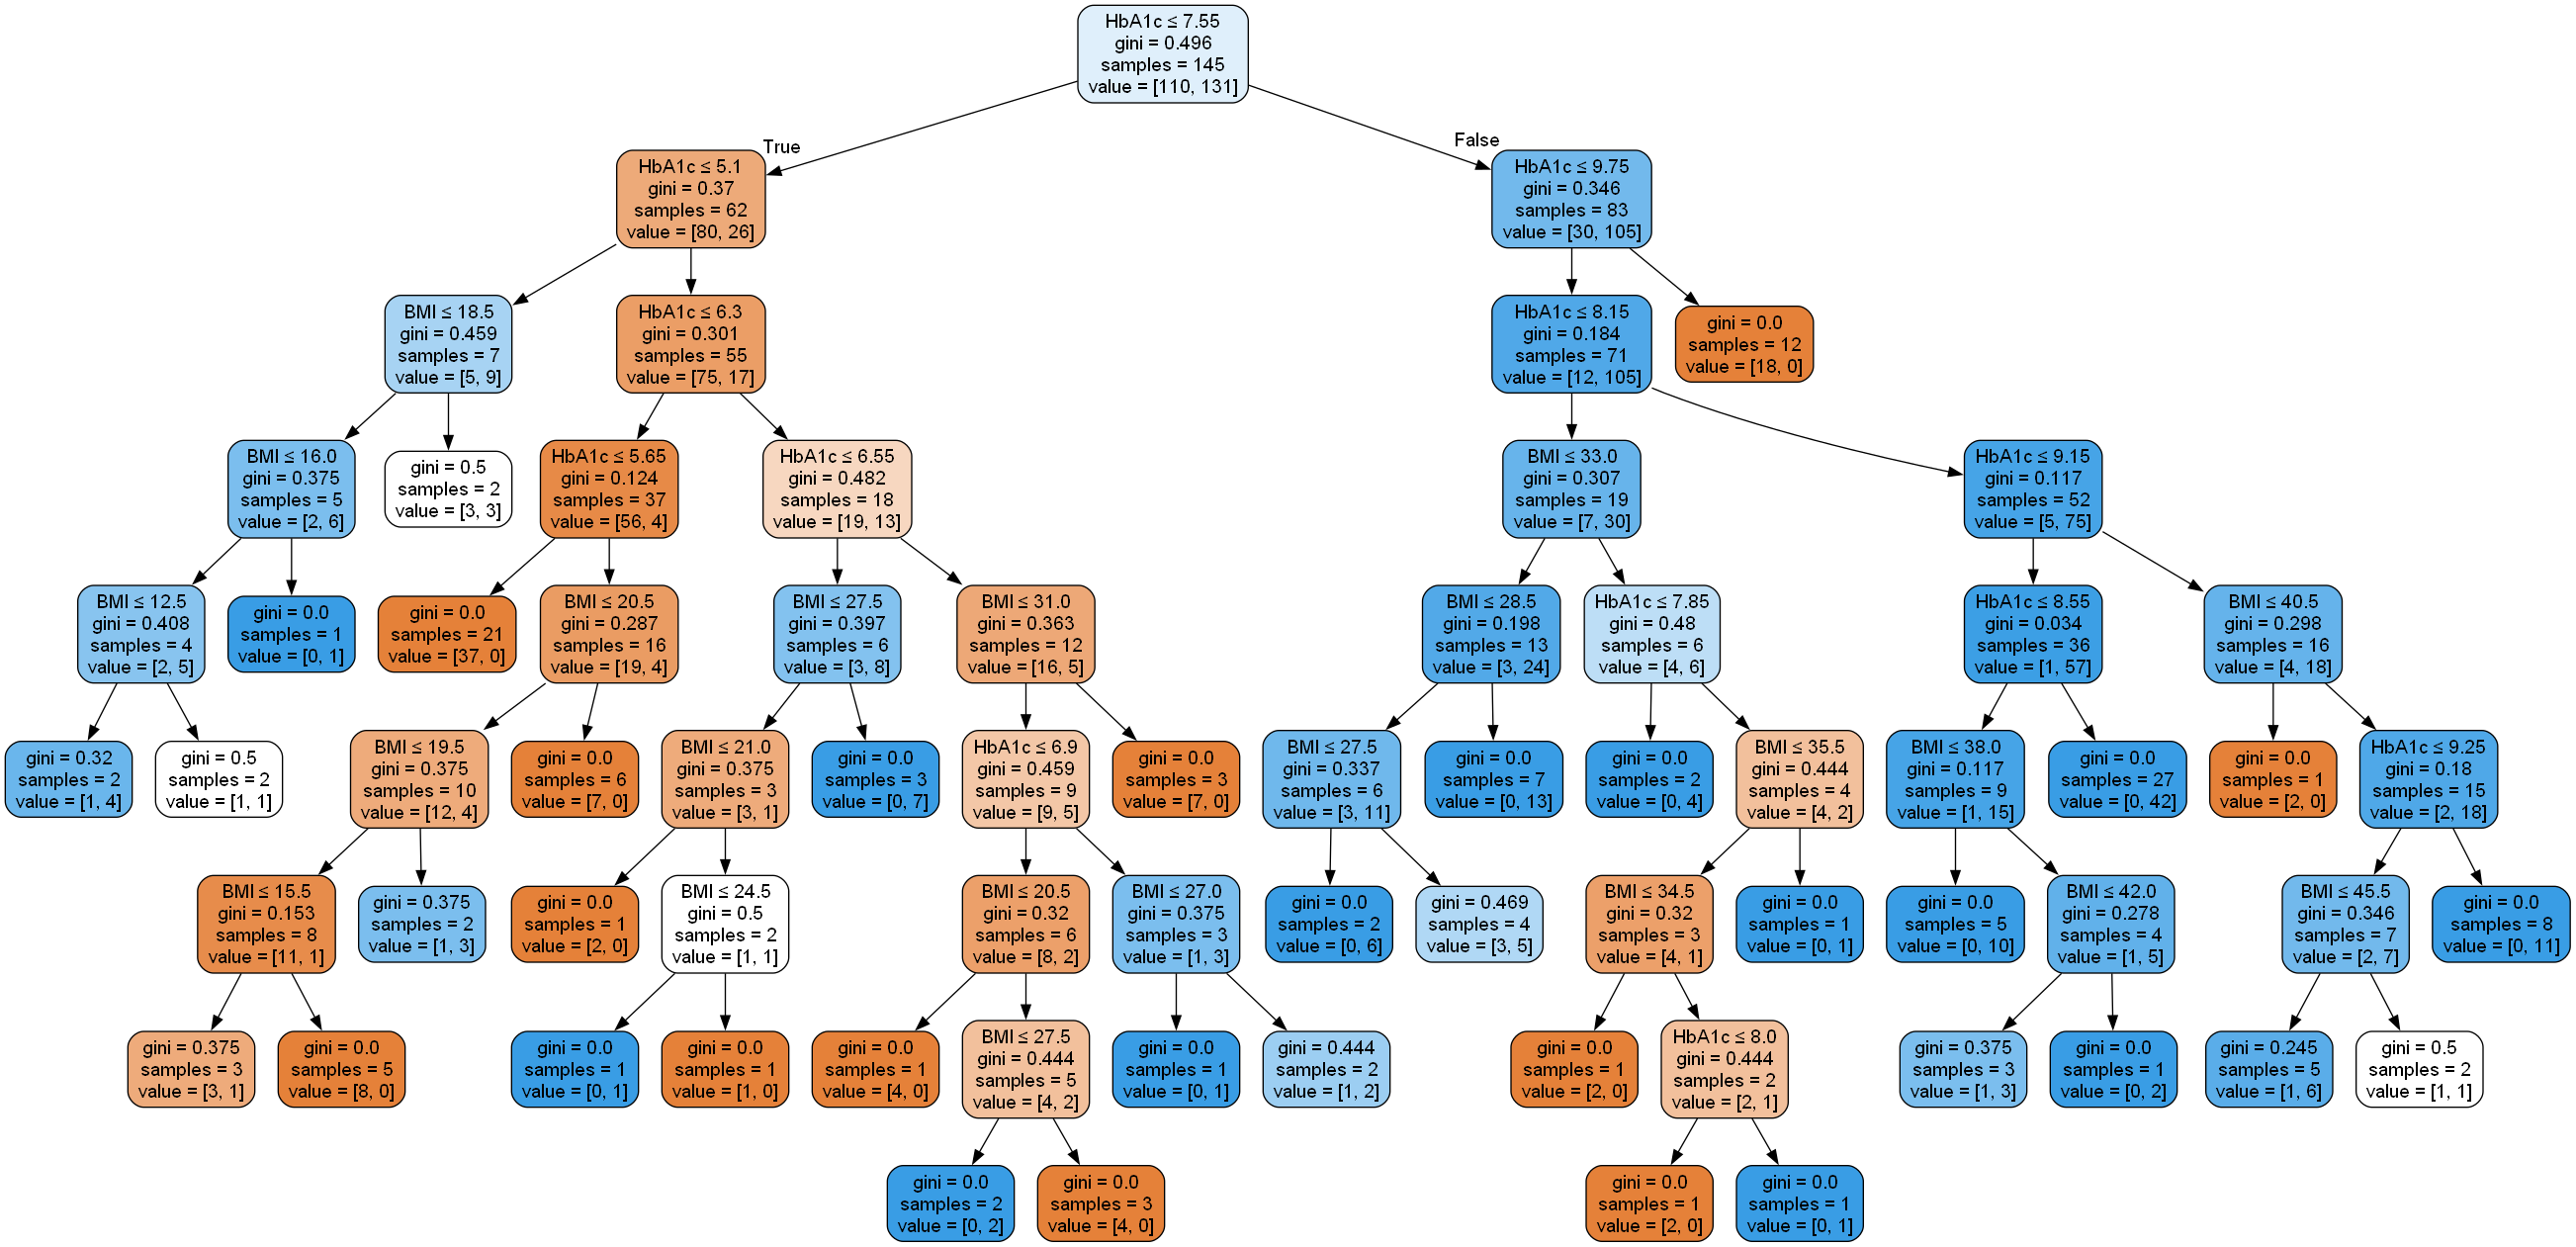

In [110]:
Image(get_png_tree(bc1.estimators_[4], ['BMI', 'HbA1c']), width='80%')

In [111]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(data_X_test, data_Y_test)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = data_X_test[:, 0], data_X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=data_Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('BMI')
    ax.set_ylabel('HbA1c')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

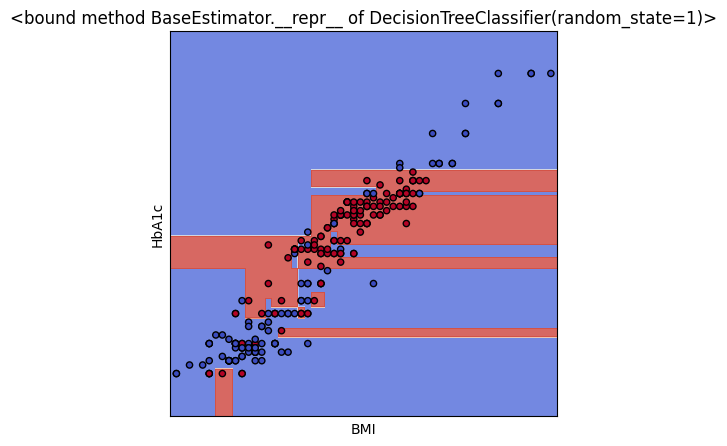

In [112]:
plot_cl(DecisionTreeClassifier(random_state=1))

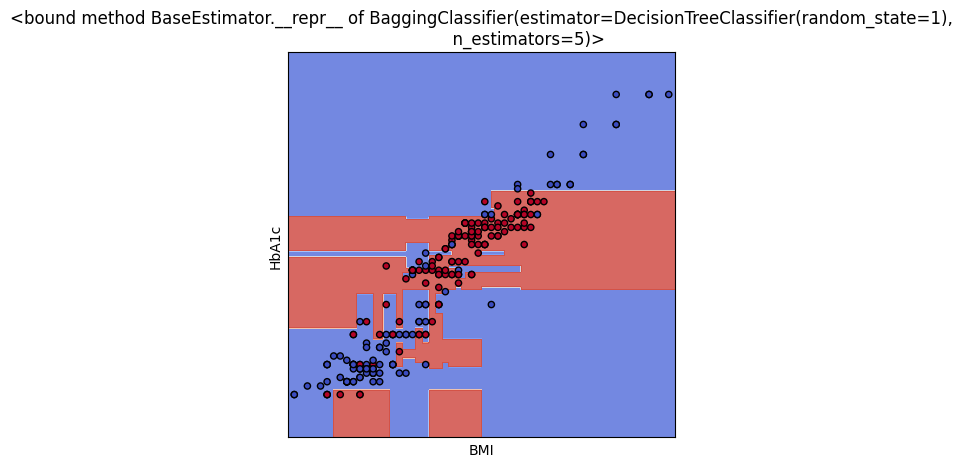

In [113]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=5))

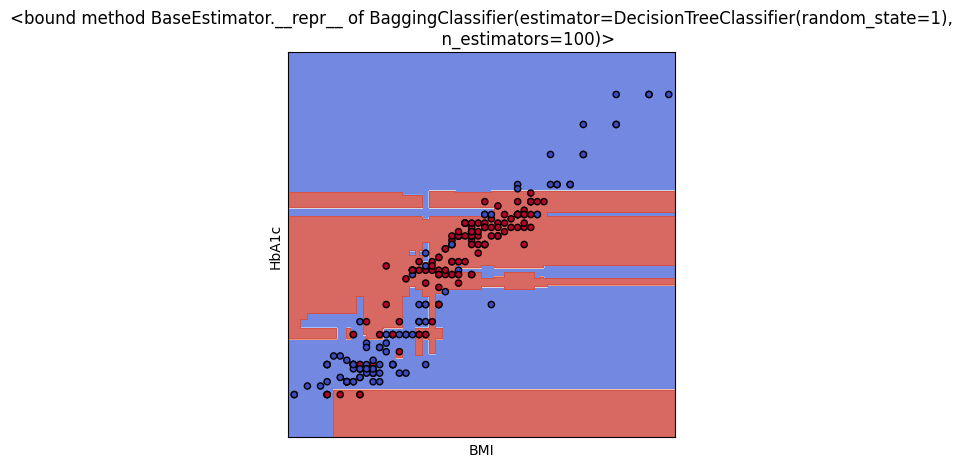

In [114]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100))

4.1 Сверхслучайные деревья

In [115]:
# Обучим классификатор на 5 деревьях
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(data_X_train, data_Y_train)

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [116]:
# Out-of-bag error, возвращаемый классификатором
tree1.oob_score_, 1-tree1.oob_score_

(0.7166666666666667, 0.2833333333333333)

In [117]:
tree1.oob_decision_function_[55:70]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 0.        ],
       [0.83333333, 0.16666667]])

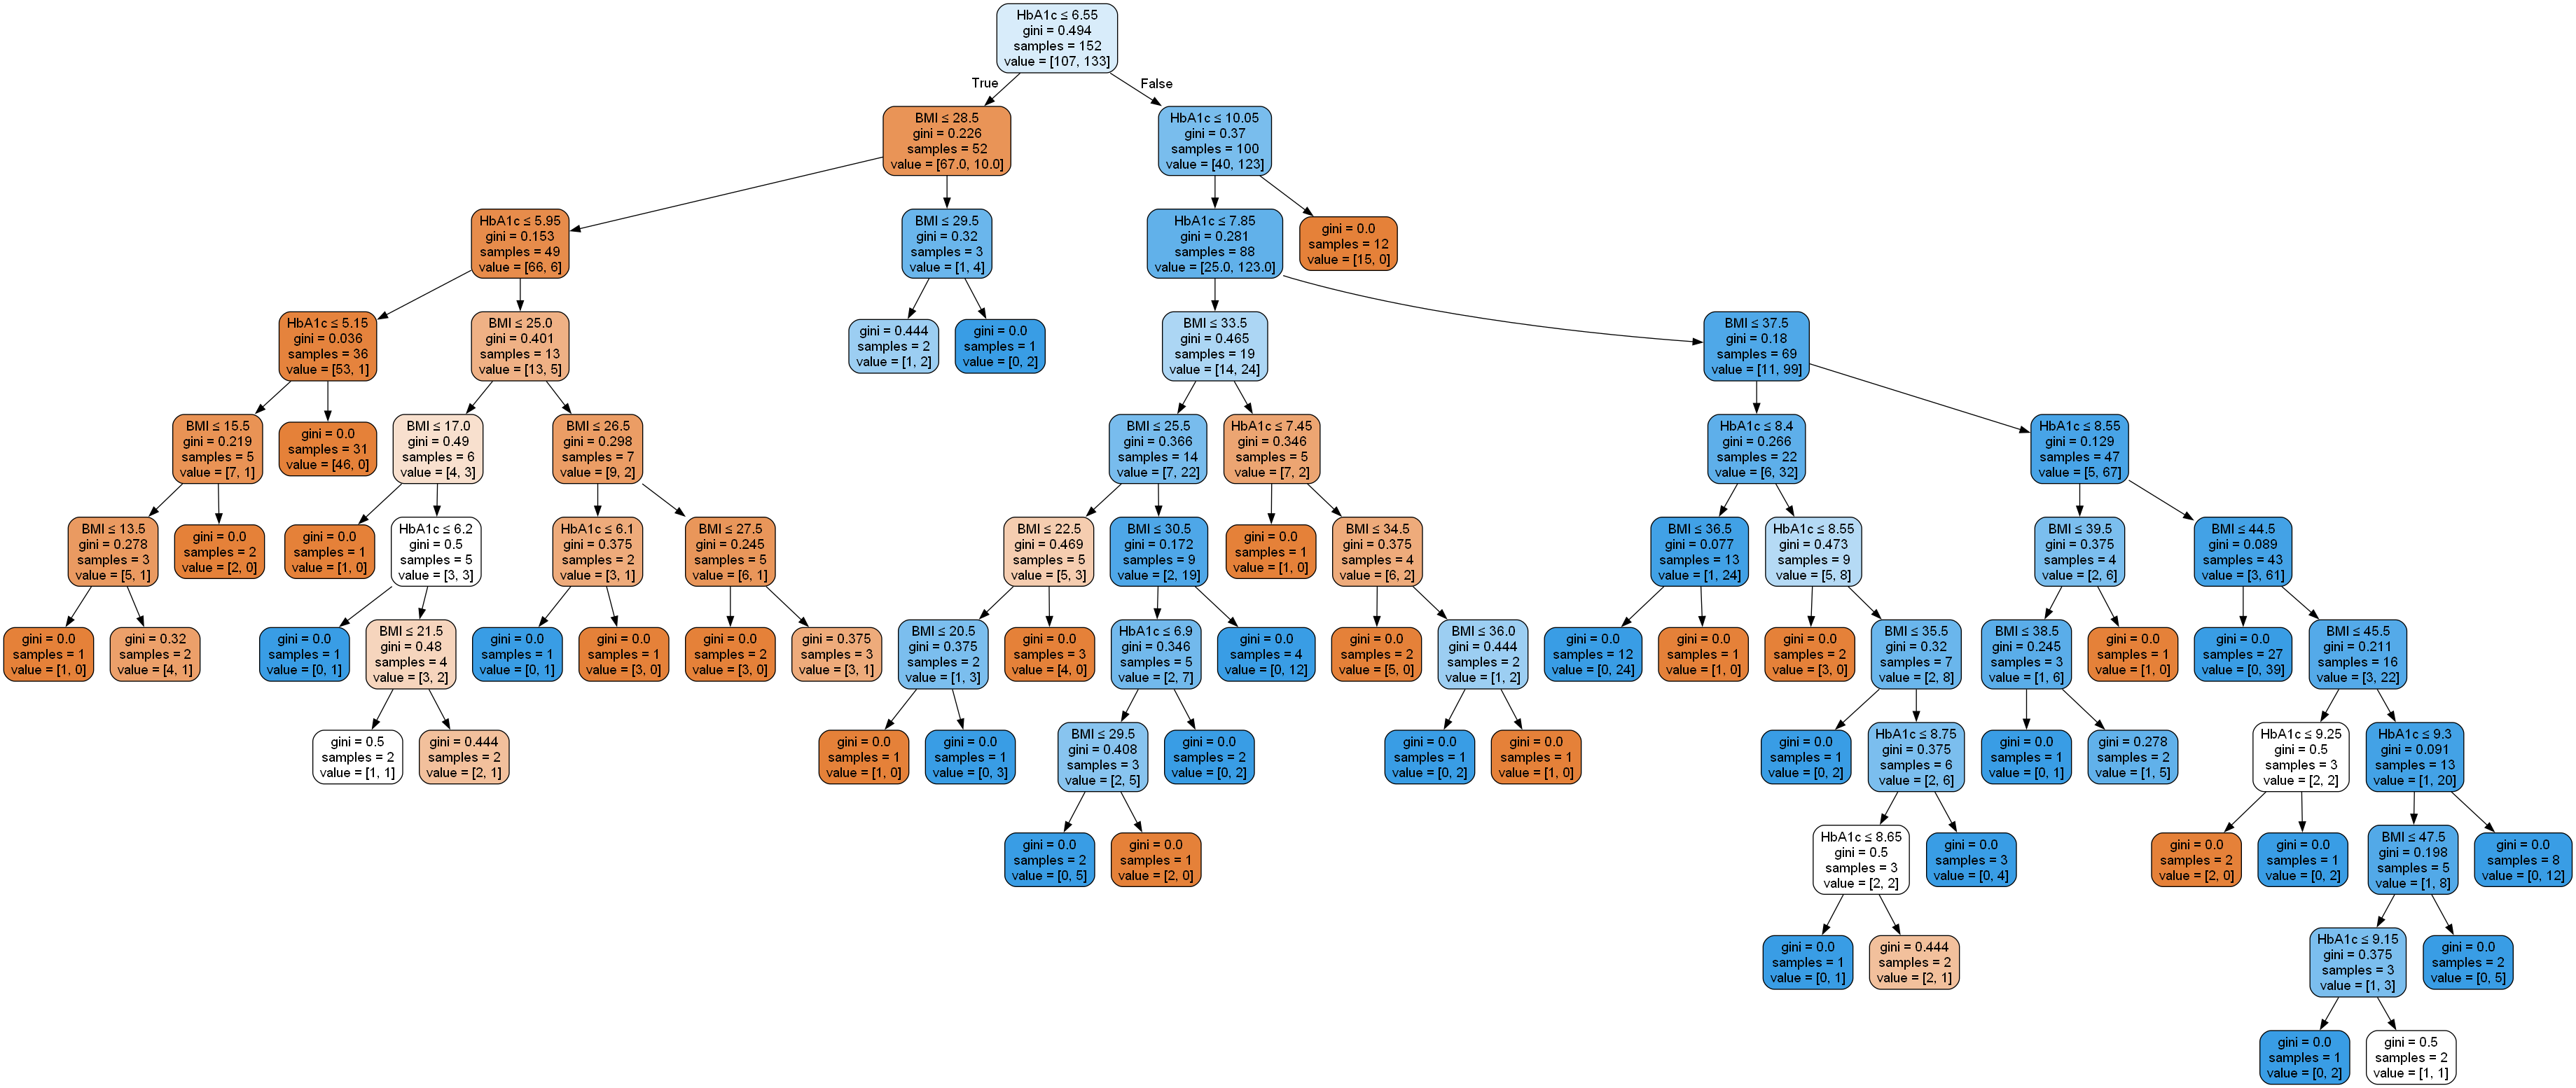

In [118]:
Image(get_png_tree(tree1.estimators_[0], ['BMI', 'HbA1c']))

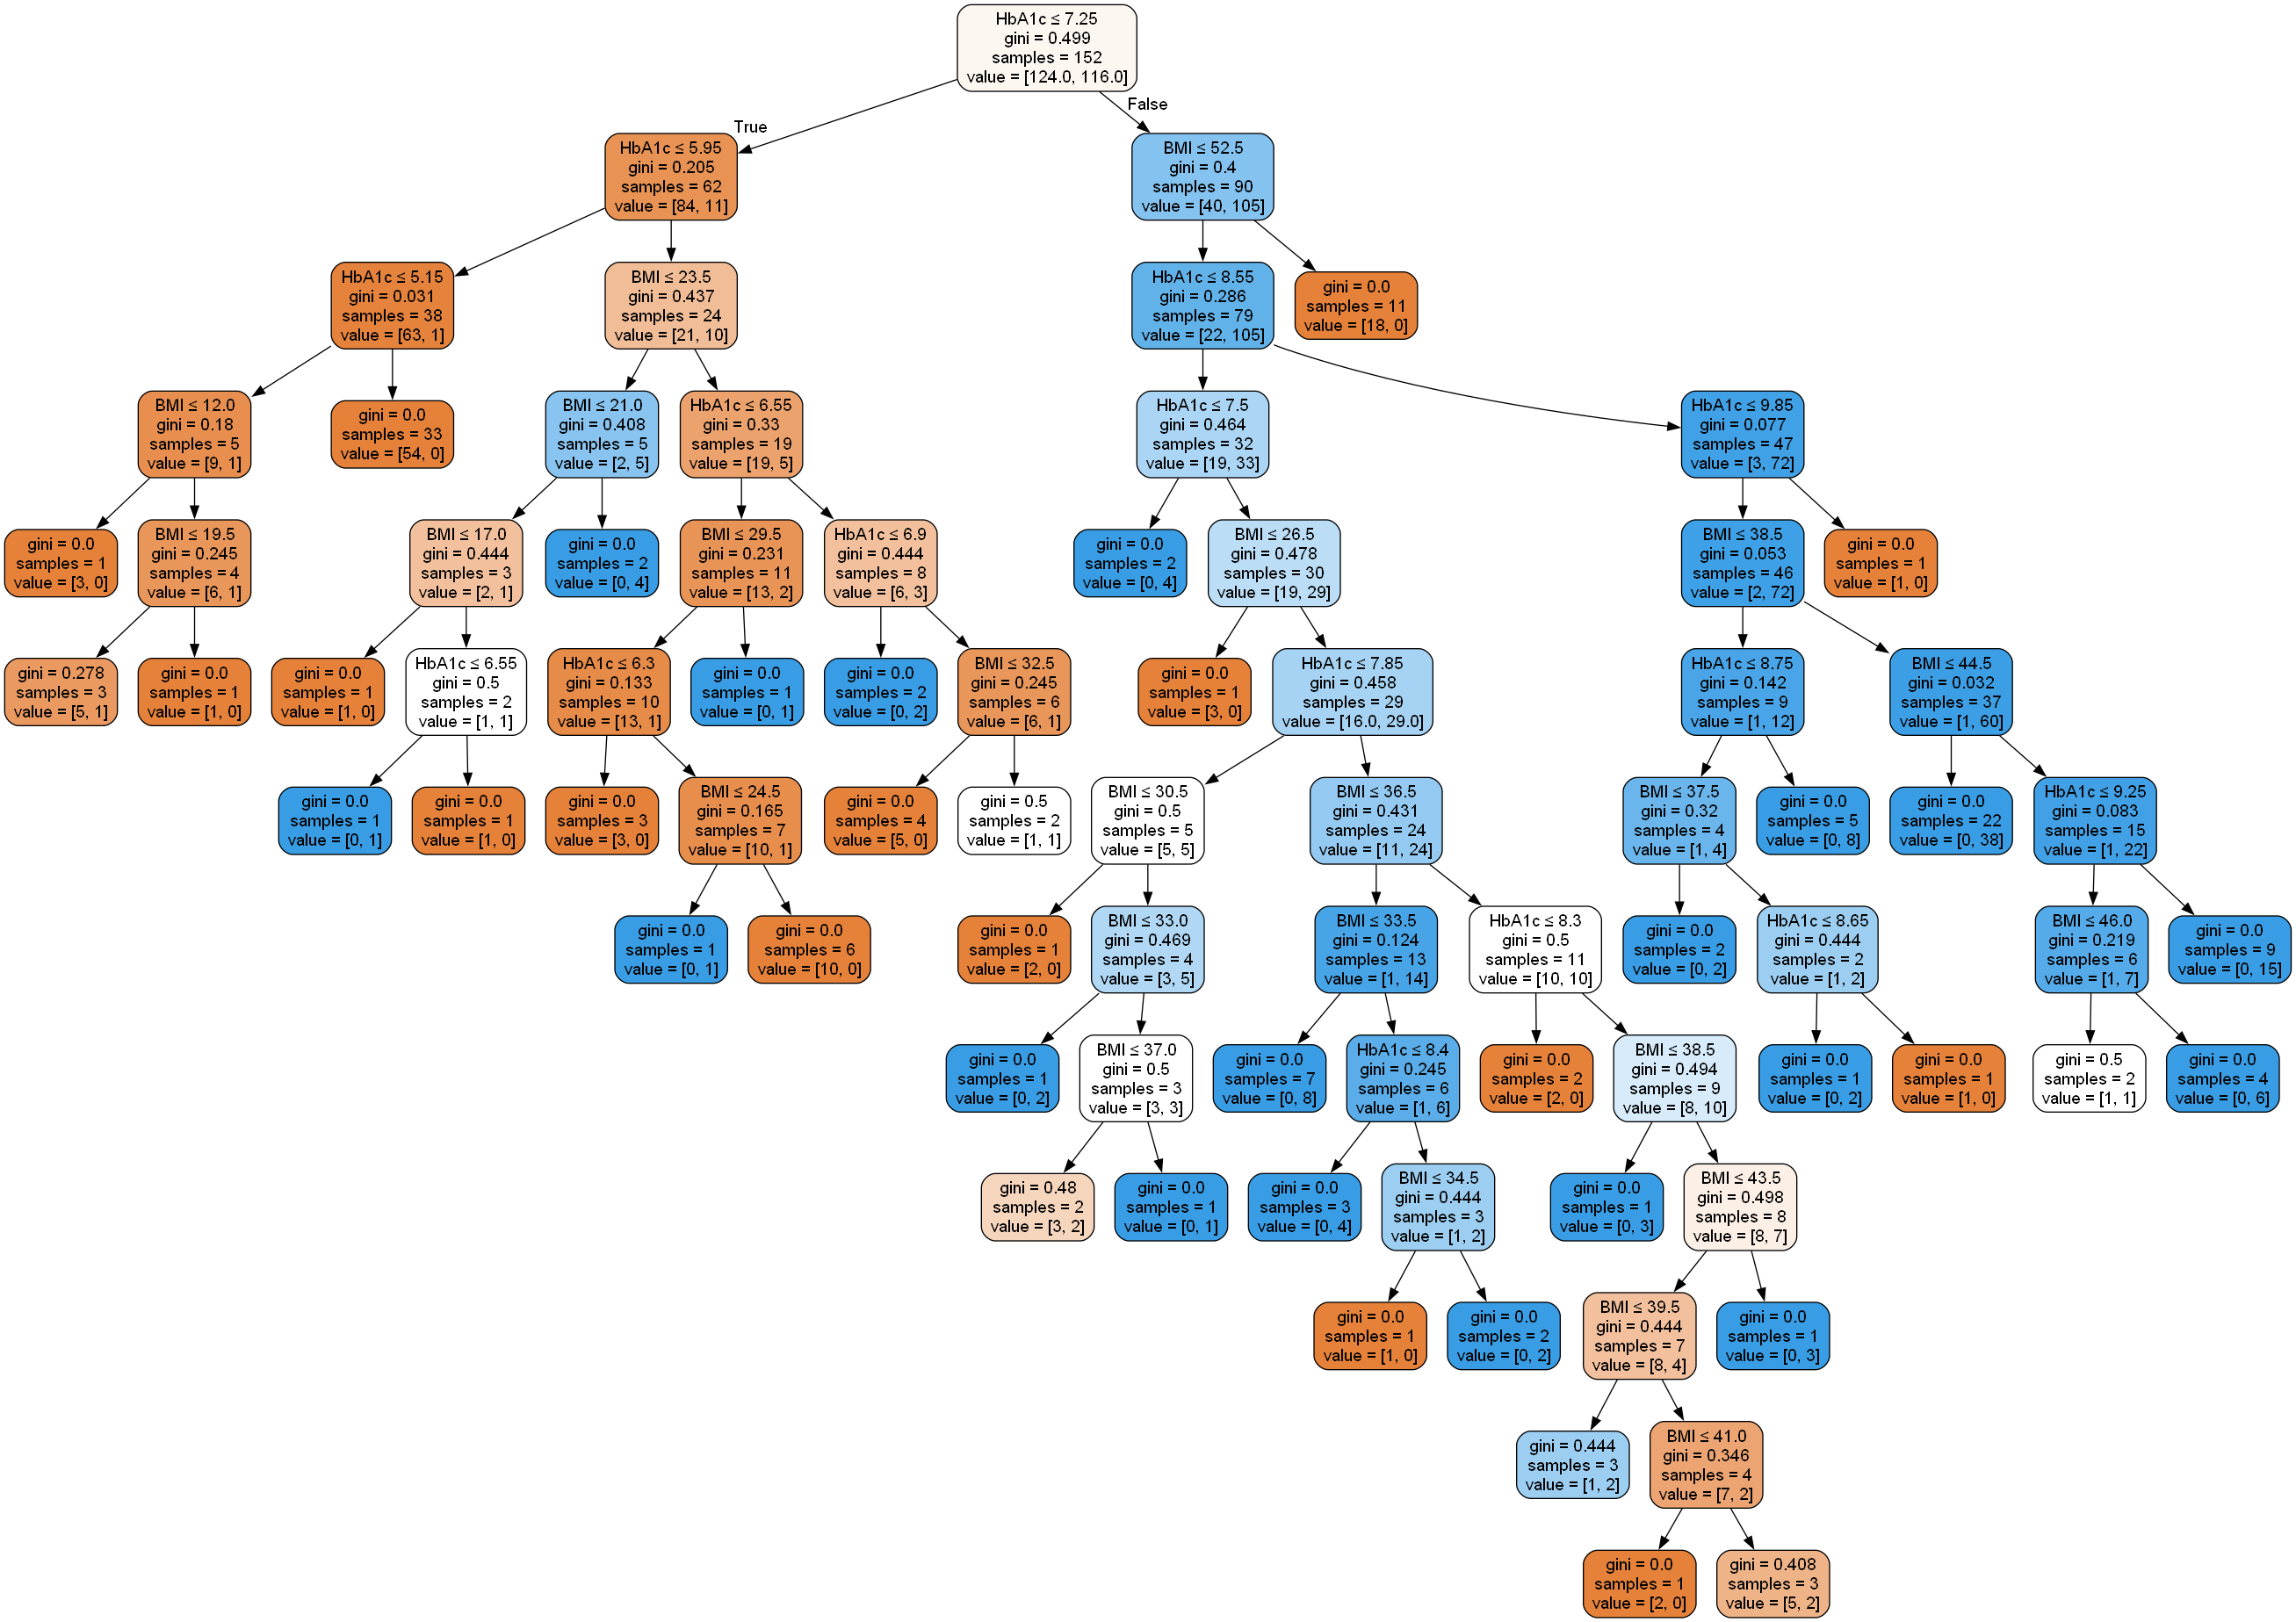

In [119]:
Image(get_png_tree(tree1.estimators_[1], ['BMI', 'HbA1c']))

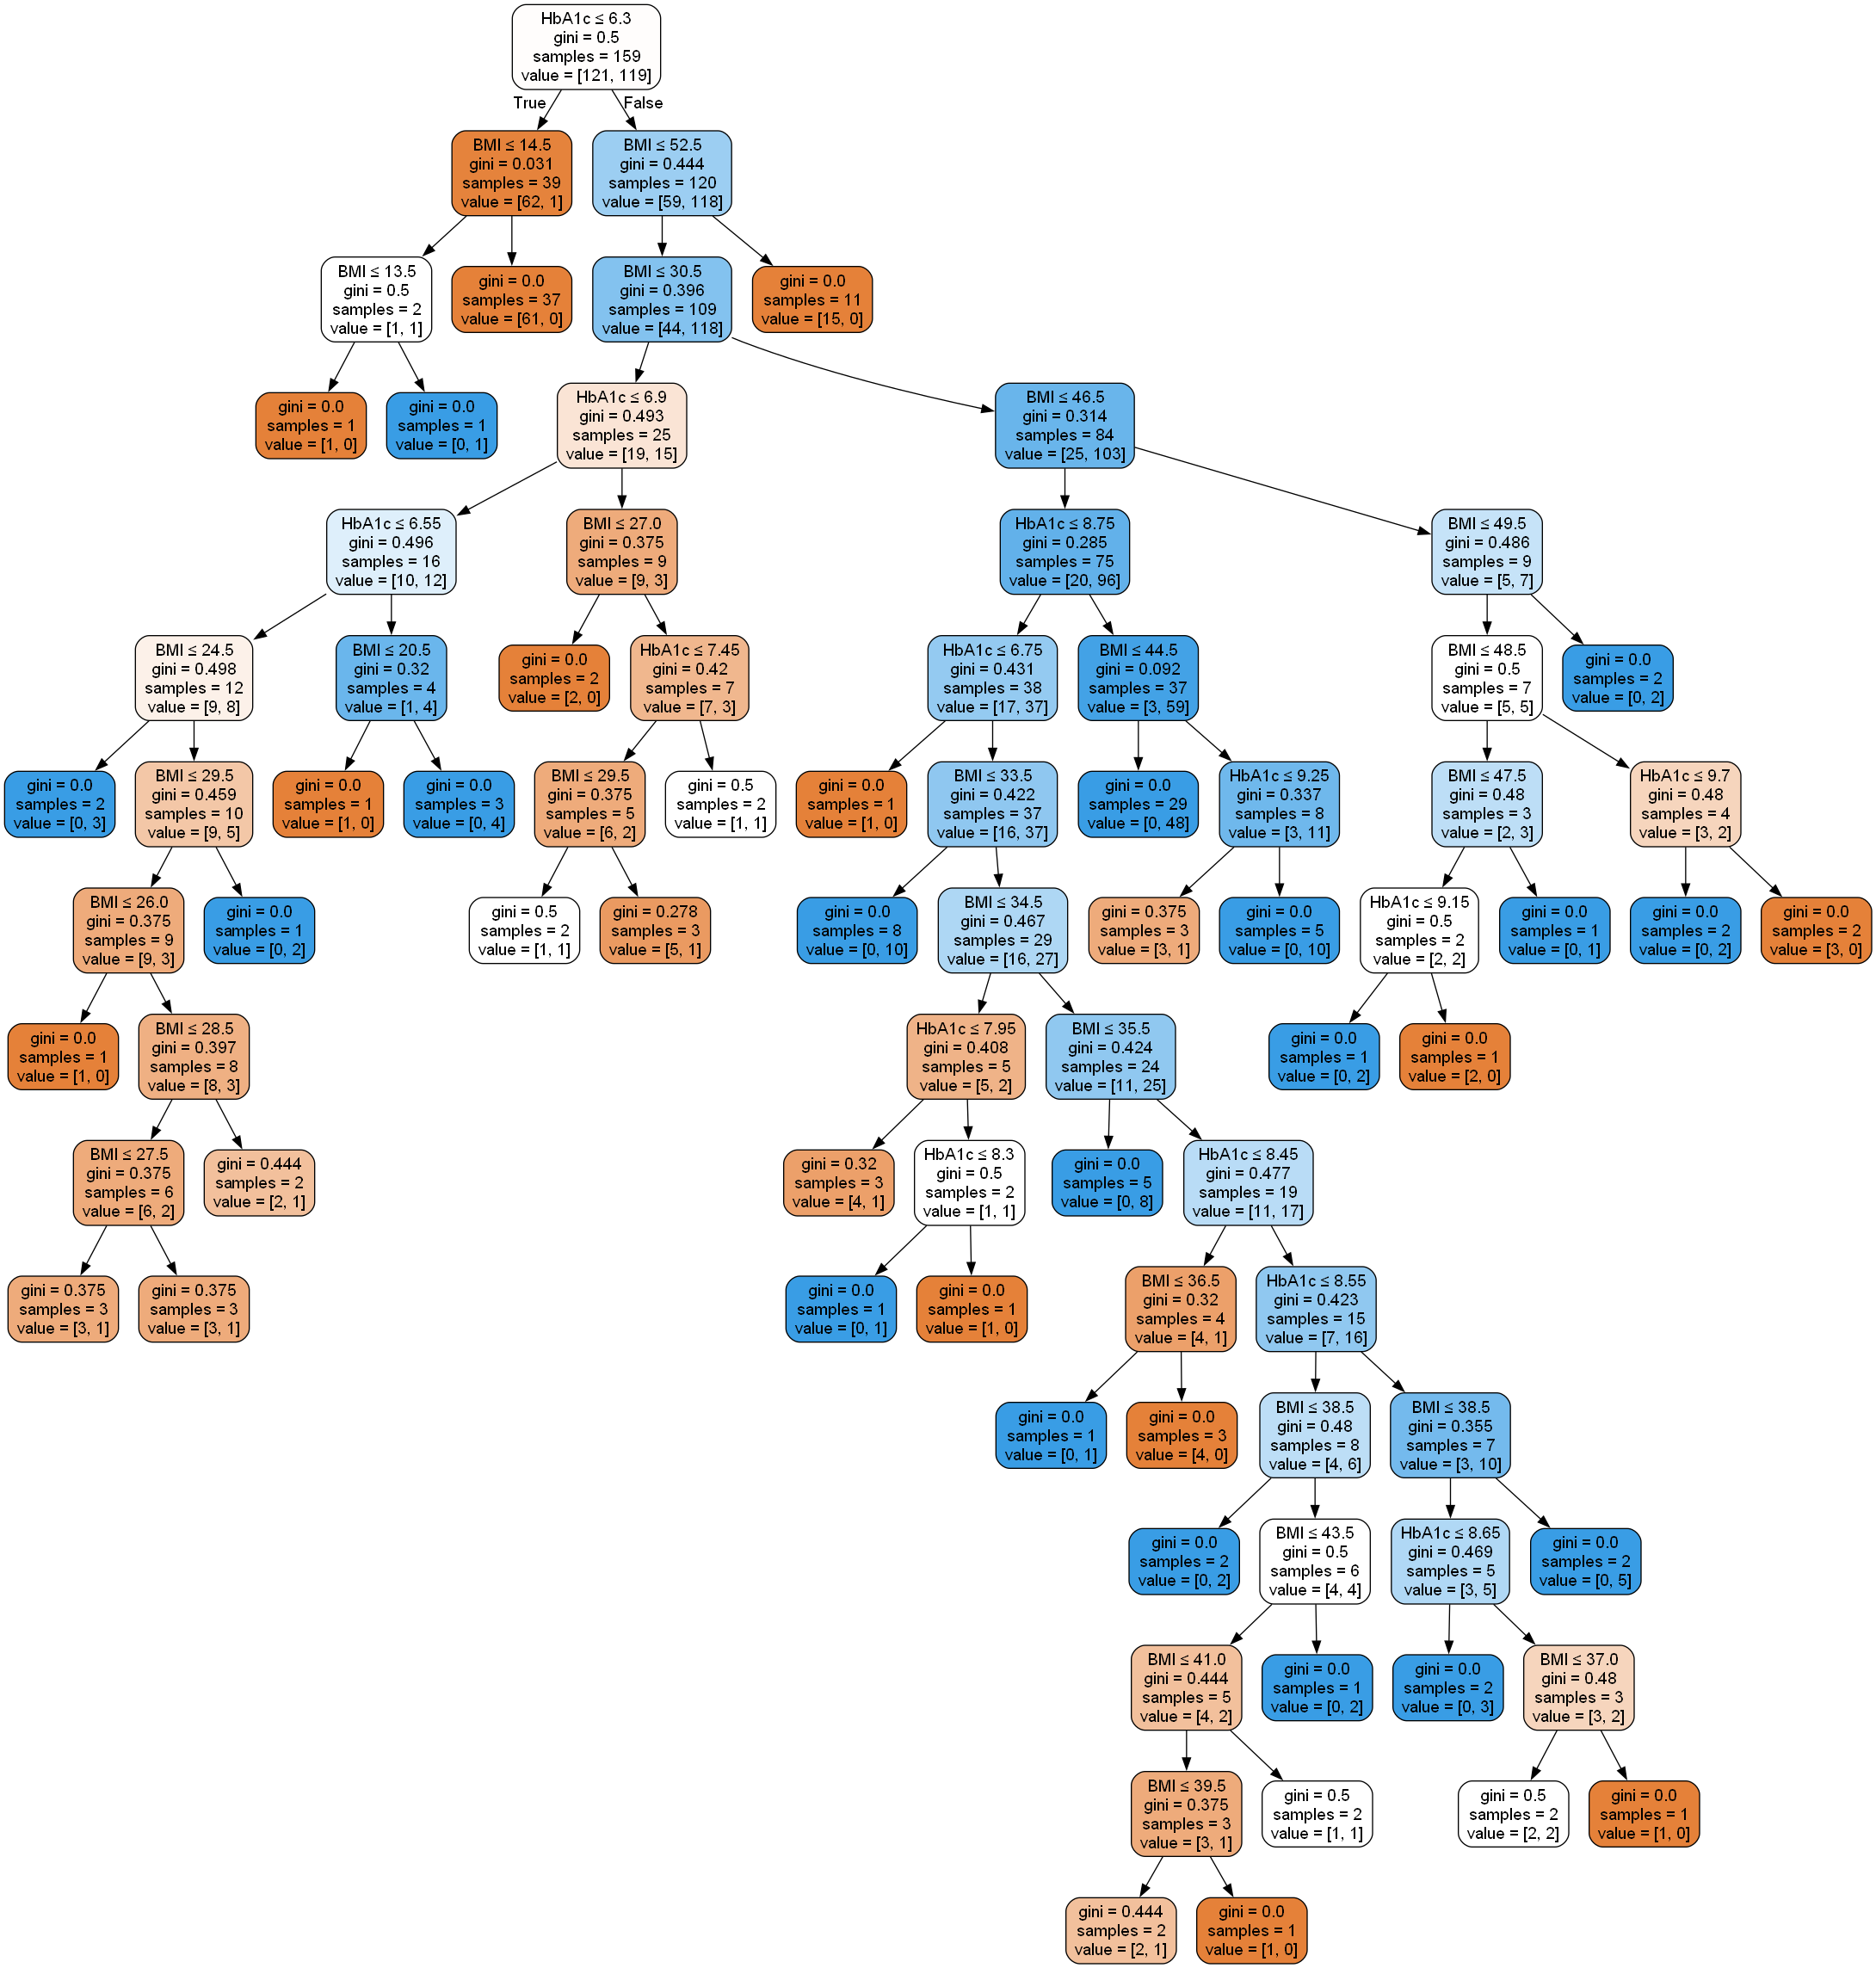

In [120]:
Image(get_png_tree(tree1.estimators_[2], ['BMI', 'HbA1c']), width="80%")

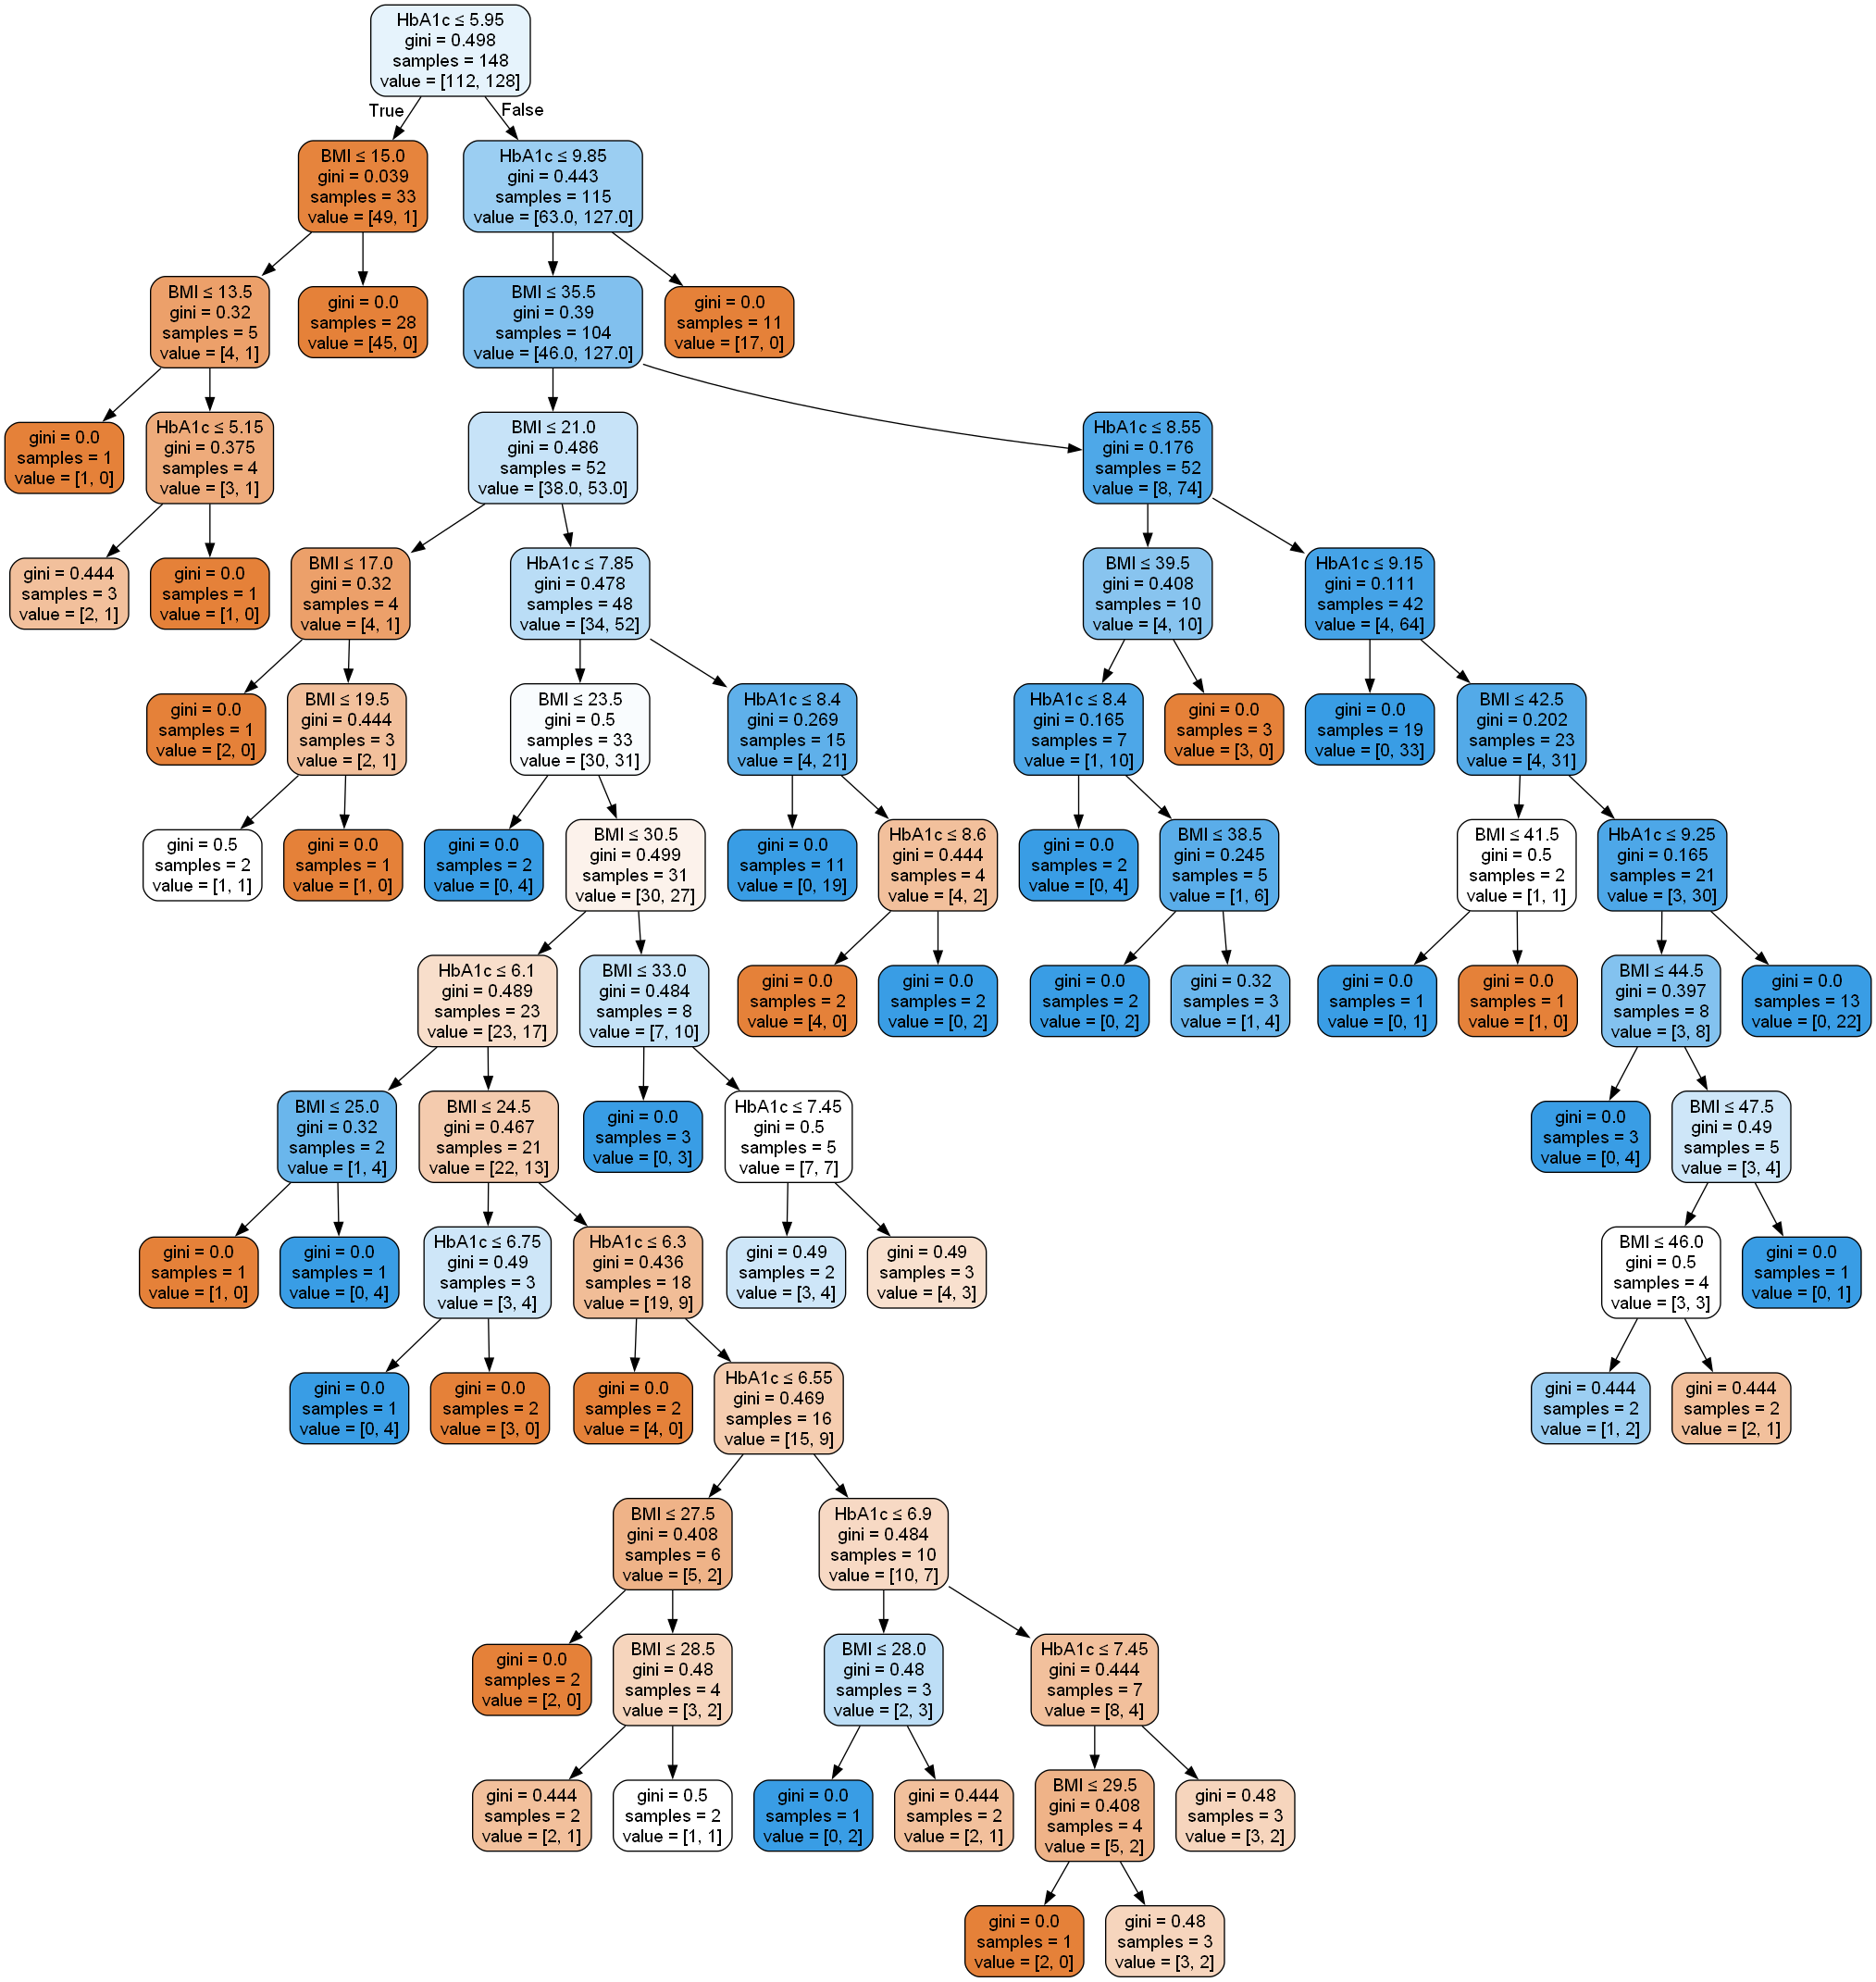

In [121]:
Image(get_png_tree(tree1.estimators_[3], ['BMI', 'HbA1c']), width="80%")

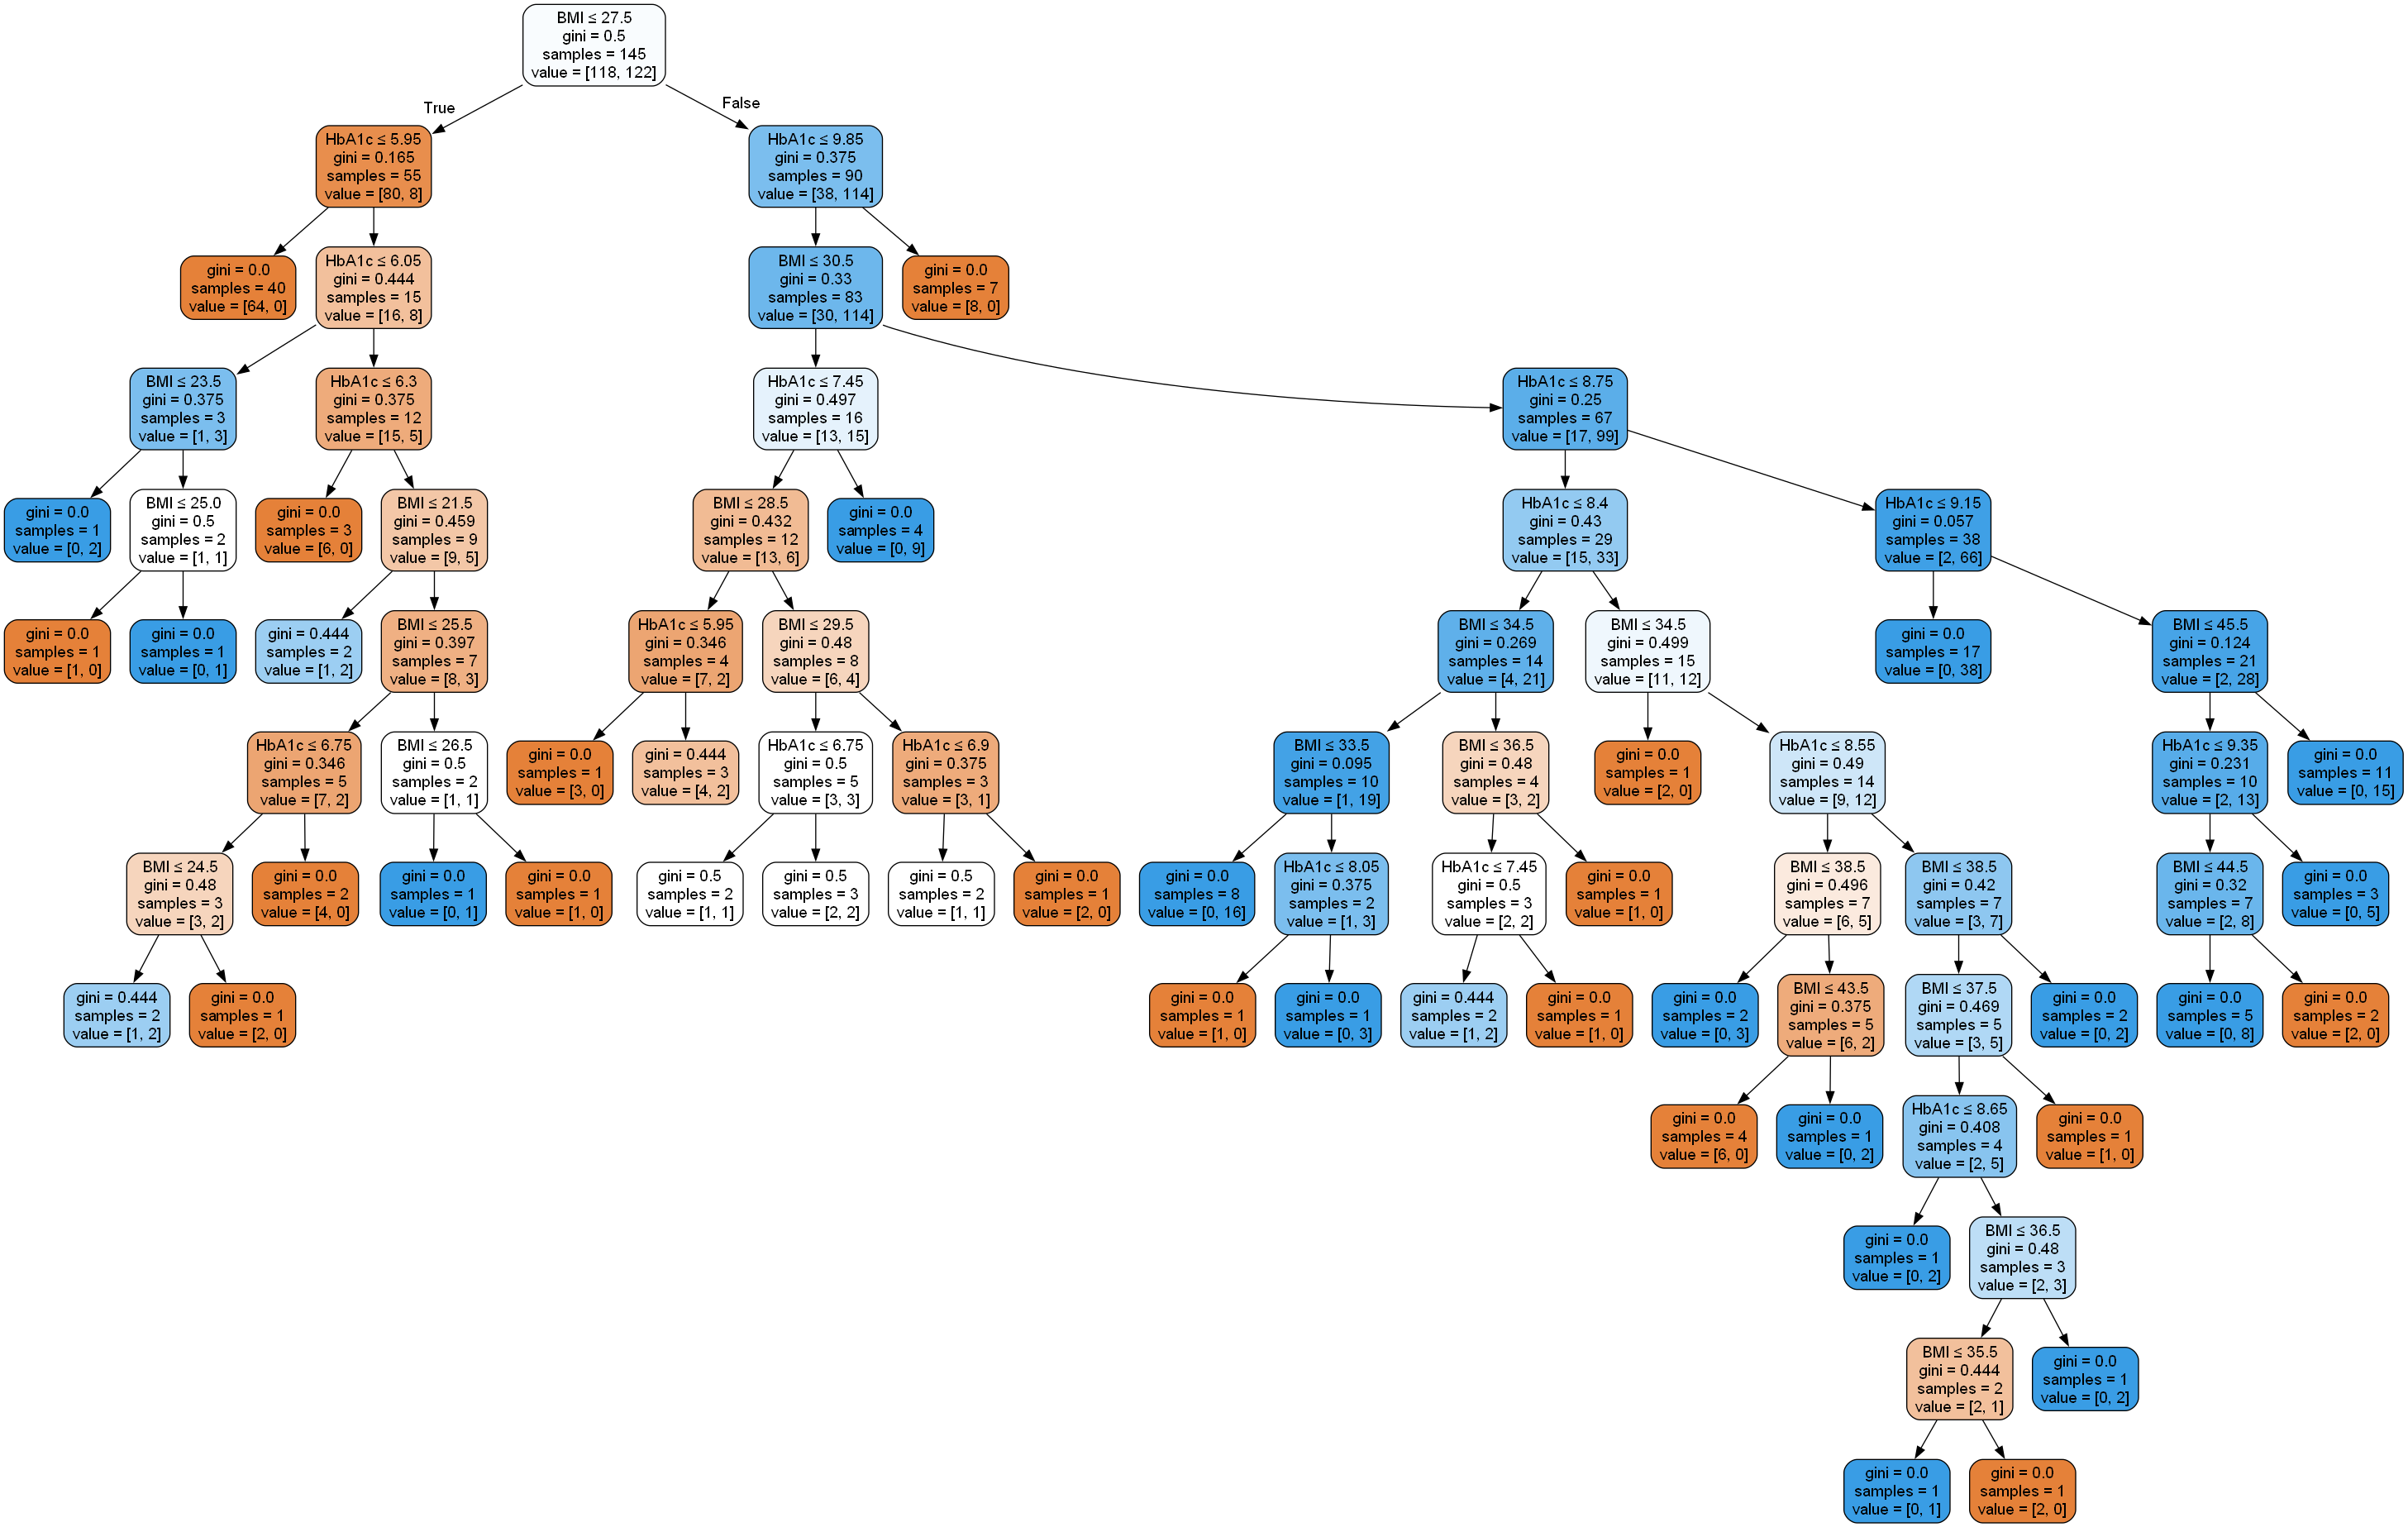

In [122]:
Image(get_png_tree(tree1.estimators_[4], ['BMI', 'HbA1c']))

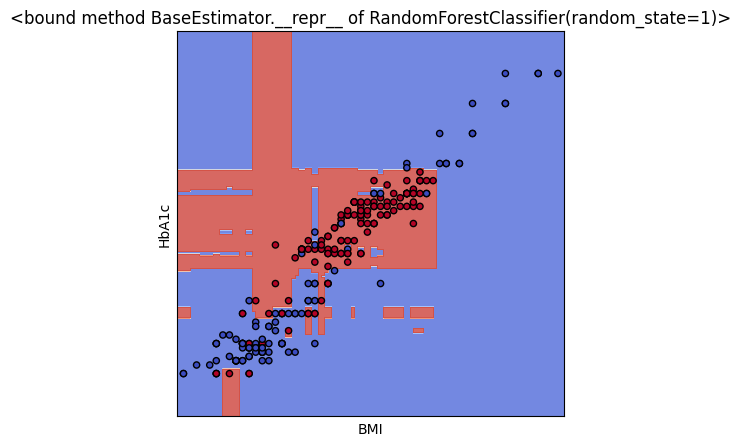

In [123]:
plot_cl(RandomForestClassifier(random_state=1))

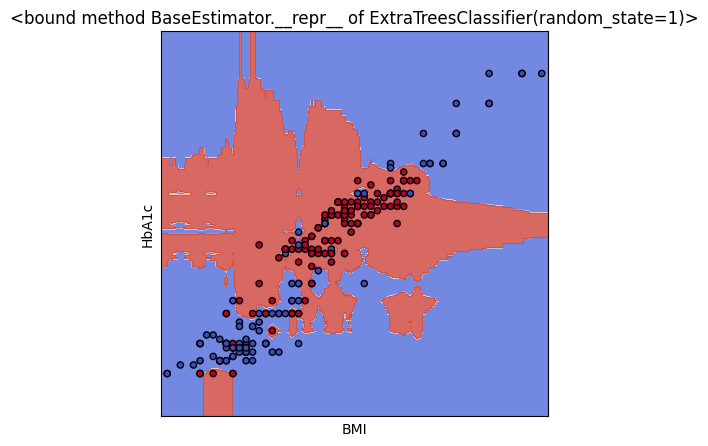

In [124]:
plot_cl(ExtraTreesClassifier(random_state=1))

In [125]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

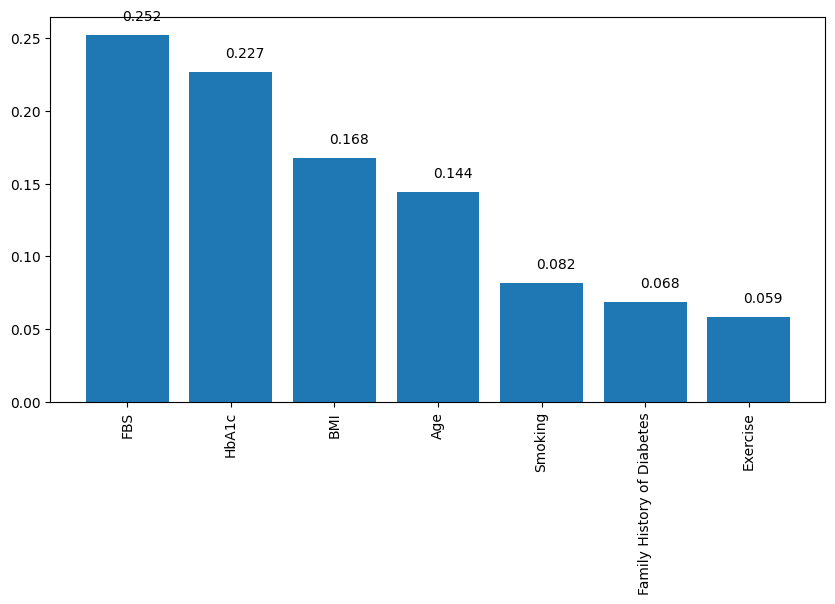

In [126]:
# Важность признаков
data_x_ds = pd.DataFrame(data=data, columns=feature_names)
data_rf_cl = RandomForestClassifier(random_state=1)
data_rf_cl.fit(data_x_ds, df[target_column])
_,_ = draw_feature_importances(data_rf_cl, data_x_ds)

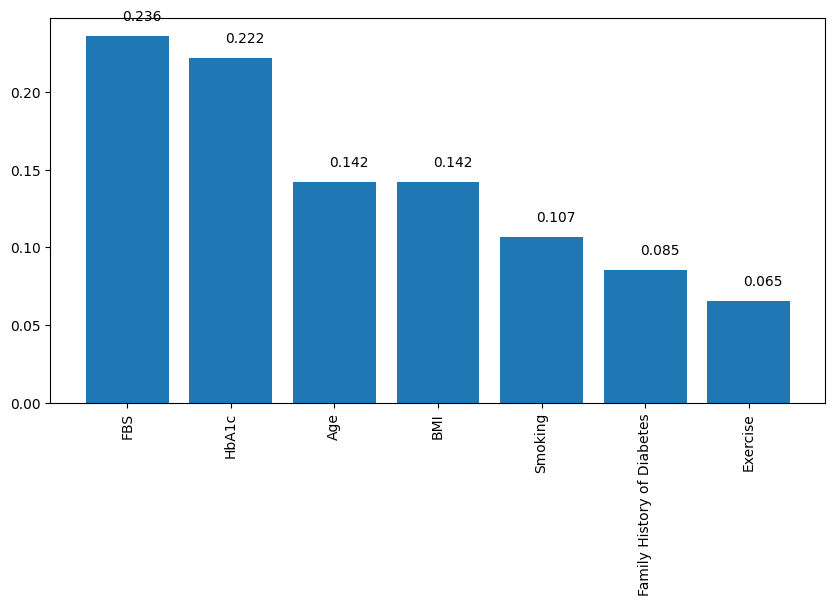

In [127]:
data_xtree_cl = ExtraTreesClassifier(random_state=1)
data_xtree_cl.fit(data_x_ds, df[target_column])
_, _ = draw_feature_importances(data_xtree_cl, data_x_ds)

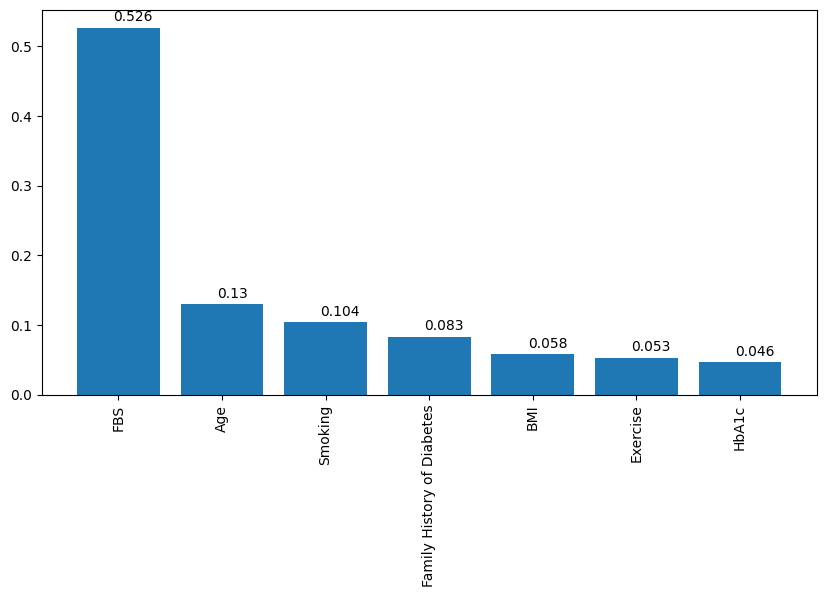

In [128]:
data_tree_cl = DecisionTreeClassifier(random_state=1)
data_tree_cl.fit(data_x_ds, df[target_column])
_,_ = draw_feature_importances(data_tree_cl, data_x_ds)

4.2 AdaBoost

In [129]:
# Обучим классификатор на 5 деревьях
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(data_X_train, data_Y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

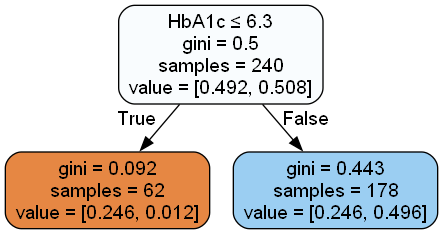

In [130]:
Image(get_png_tree(ab1.estimators_[0], ['BMI', 'HbA1c']), width='30%')

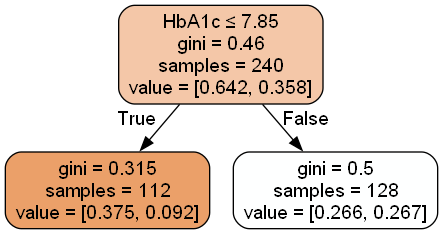

In [131]:
Image(get_png_tree(ab1.estimators_[1], ['BMI', 'HbA1c']), width='30%')

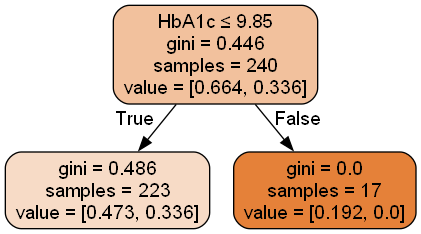

In [132]:
Image(get_png_tree(ab1.estimators_[2], ['BMI', 'HbA1c']), width='30%')

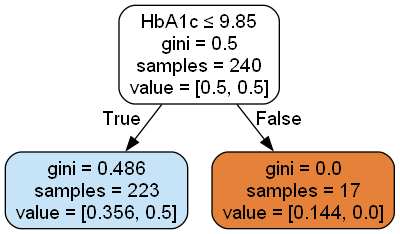

In [133]:
Image(get_png_tree(ab1.estimators_[3], ['BMI', 'HbA1c']), width='30%')

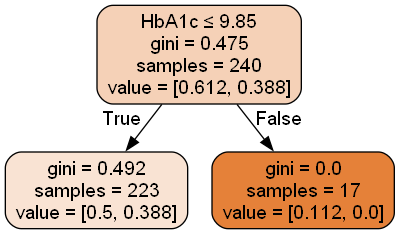

In [134]:
Image(get_png_tree(ab1.estimators_[4], ['BMI', 'HbA1c']), width='30%')

In [135]:
ab1.estimator_weights_

array([1.05464917, 0.58519409, 0.68213482, 0.5938257 , 0.45550518])

In [136]:
df1 = ab1.decision_function(data_X_train)
df1.shape

(240,)

In [137]:
df1[:10]

array([ 0.65020974, -1.29543603, -1.29543603,  0.65020974,  0.65020974,
        0.65020974,  0.65020974,  0.65020974, -1.29543603,  0.65020974])

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


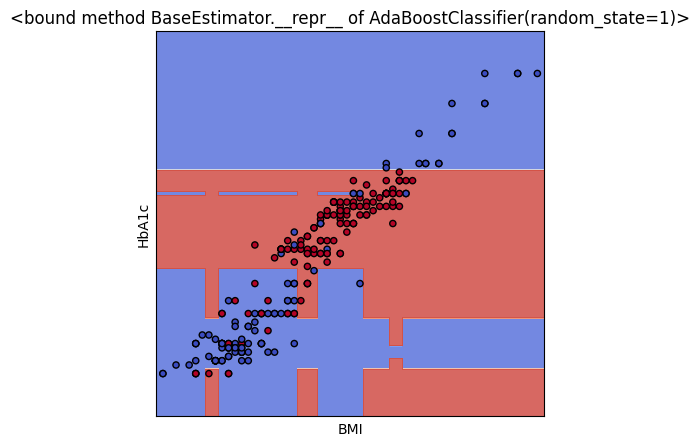

In [138]:
# Результаты классификации
plot_cl(AdaBoostClassifier(random_state=1))

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


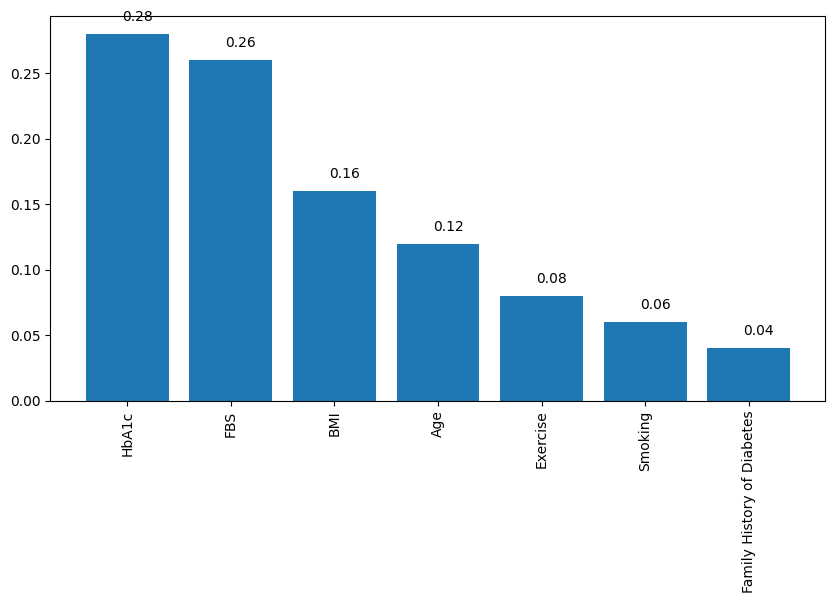

In [139]:
# Важность признаков
data_x_ds = pd.DataFrame(data=data, columns=feature_names)
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(data_x_ds, df[target_column])
_,_ = draw_feature_importances(ab2, data_x_ds)

4.3 Градиентный бустинг

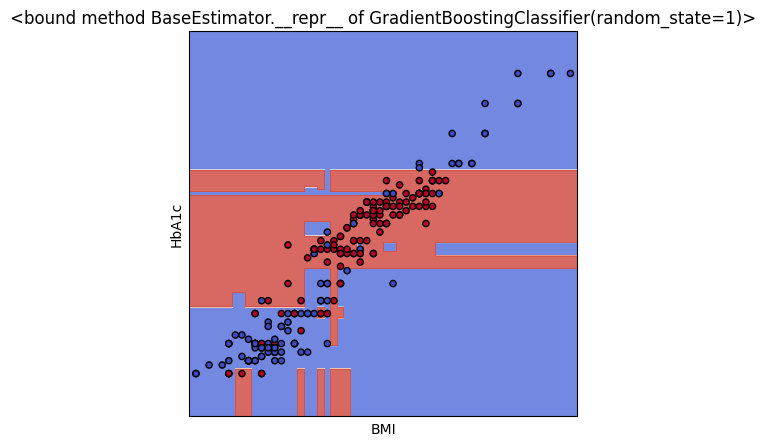

In [140]:
plot_cl(GradientBoostingClassifier(random_state=1))

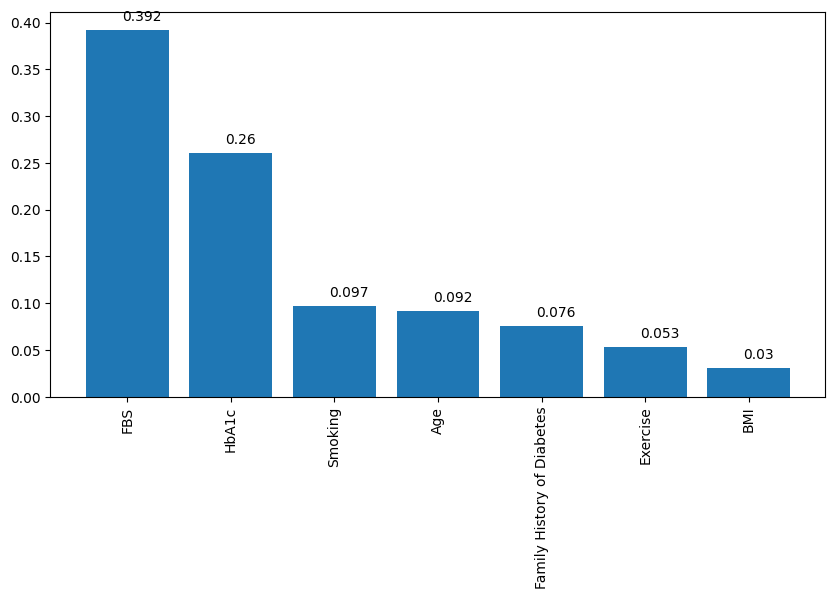

In [141]:
# Важность признаков
data_gb_cl = GradientBoostingClassifier(random_state=1)
data_gb_cl.fit(data_x_ds, df[target_column])
_,_ = draw_feature_importances(data_gb_cl, data_x_ds)

5. Оценка качества моделей

In [142]:
# Оценка качества моделей с помощью метрик accuracy и F1-score
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)
    
    # Вычисление accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Вычисление F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, f1

# Создание моделей
models = {
    "Bagging Classifier": BaggingClassifier(n_estimators=5, oob_score=True, random_state=10),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=10),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=10)
}

# Сравнение качества моделей
for name, model in models.items():
    accuracy, f1 = evaluate_model(model, data_X_train, data_Y_train, data_X_test, data_Y_test)
    print(f"Модель: {name}")
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"F1-мера: {f1:.4f}")
    print("-" * 30)

Модель: Bagging Classifier
Точность (Accuracy): 0.7842
F1-мера: 0.7842
------------------------------
Модель: Random Forest Classifier
Точность (Accuracy): 0.7801
F1-мера: 0.7800
------------------------------
Модель: Extra Trees Classifier
Точность (Accuracy): 0.7718
F1-мера: 0.7719
------------------------------
Модель: AdaBoost Classifier
Точность (Accuracy): 0.7967
F1-мера: 0.7963
------------------------------
Модель: Gradient Boosting Classifier
Точность (Accuracy): 0.8091
F1-мера: 0.8090
------------------------------


c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
